<h1 align="center">Ecommerce Dataset Exploratory Data Analysis</h1>

This ecommerce behavior dataset, comprising interactions from multiple categories, offers a unique opportunity to delve into the complexities of online shopping behavior. As I embarked on an exploratory data analysis (EDA) journey, I sought to uncover the hidden patterns, trends, and insights within this rich dataset. With over 10 crore records and 9 features, this dataset presents a fascinating puzzle to unravel. Through a combination of visualizations, statistical summaries, and data manipulation, I aimed to extract meaningful information from the noise. From understanding user demographics and behavior to identifying popular products and categories, my EDA journey revealed a wealth of knowledge about the ecommerce landscape. In this report, I will guide you through my findings, highlighting the most significant discoveries, challenges, and opportunities for improvement, ultimately providing a comprehensive understanding of this ecommerce behavior dataset.

# Data Sampling and Overview

The ecommerce retail dataset from Kaggle, consisting of 10 crore transactions, provides a comprehensive snapshot of customer behavior and purchasing patterns. To facilitate exploratory data analysis and modeling, a random sample of 2% of the total transactions will be selected . This sampled dataset retains the essential characteristics of the original data, including the distribution of events across different days of the week and hours of the day. The sampled data comprises three primary event types: view, cart, and purchase, which are crucial for understanding the customer journey and optimizing the online shopping experience. 

## Libraries 

In [1]:
import numpy as np
import pandas as pd
import dask.dataframe as dd
import dask
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import polars as pl
import pyarrow as pa
from wordcloud import WordCloud
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

## Overview of Data

Data overviewing involves examining the dataset as a whole to understand its structure, contents, and key characteristics. This process helps in gaining insights into the dataset's scope, variables, and potential patterns. Outcomes of data overviewing include identifying data types, detecting missing values, assessing data distributions, and recognizing any initial trends or anomalies that may guide further analysis and decision-making.


In [2]:
df_nov = pl.scan_csv('/kaggle/input/ecommerce-behavior-data-from-multi-category-store/2019-Nov.csv')
df_oct = pl.scan_csv('/kaggle/input/ecommerce-behavior-data-from-multi-category-store/2019-Oct.csv')

In [3]:
# let's take a look at the columns
column_names  = df_nov.columns
print(column_names)

['event_time', 'event_type', 'product_id', 'category_id', 'category_code', 'brand', 'price', 'user_id', 'user_session']


In [4]:
df_nov.schema

OrderedDict([('event_time', String),
             ('event_type', String),
             ('product_id', Int64),
             ('category_id', Int64),
             ('category_code', String),
             ('brand', String),
             ('price', Float64),
             ('user_id', Int64),
             ('user_session', String)])

In [5]:
# now let's change the dtypes so that the dataset fits into memory. this operationis going to be done on both the datasets and for that we will concat them together and see how many rows does tghe combined dataframe has.

df_final = pl.concat([df_nov,df_oct])
df_final.select(pl.len())

In [6]:
# casting price to float32 

df_final.select(
    pl.col("price").cast(pl.Float32),
)

df_final.select('*').fetch(10)

shape: (20, 9)
┌────────────┬────────────┬────────────┬───────────┬───┬──────────┬────────┬───────────┬───────────┐
│ event_time ┆ event_type ┆ product_id ┆ category_ ┆ … ┆ brand    ┆ price  ┆ user_id   ┆ user_sess │
│ ---        ┆ ---        ┆ ---        ┆ id        ┆   ┆ ---      ┆ ---    ┆ ---       ┆ ion       │
│ str        ┆ str        ┆ i64        ┆ ---       ┆   ┆ str      ┆ f64    ┆ i64       ┆ ---       │
│            ┆            ┆            ┆ i64       ┆   ┆          ┆        ┆           ┆ str       │
╞════════════╪════════════╪════════════╪═══════════╪═══╪══════════╪════════╪═══════════╪═══════════╡
│ 2019-11-01 ┆ view       ┆ 1003461    ┆ 205301355 ┆ … ┆ xiaomi   ┆ 489.07 ┆ 520088904 ┆ 4d3b30da- │
│ 00:00:00   ┆            ┆            ┆ 563188265 ┆   ┆          ┆        ┆           ┆ a5e4-49df │
│ UTC        ┆            ┆            ┆ 5         ┆   ┆          ┆        ┆           ┆ -b1a8-ba5 │
│            ┆            ┆            ┆           ┆   ┆          ┆        ┆           ┆ 943…      │
│ 2019-11-01 ┆ view       ┆ 5000088    ┆ 205301356 ┆ … ┆ janome   ┆ 293.65 ┆ 530496790 ┆ 8e5f4f83- │
│ 00:00:00   ┆            ┆            ┆ 610086603 ┆   ┆          ┆        ┆           ┆ 366c-4f70 │
│ UTC        ┆            ┆            ┆ 5         ┆   ┆          ┆        ┆           ┆ -860e-ca7 │
│            ┆            ┆            ┆           ┆   ┆          ┆        ┆           ┆ 417…      │
│ 2019-11-01 ┆ view       ┆ 17302664   ┆ 205301355 ┆ … ┆ creed    ┆ 28.31  ┆ 561587266 ┆ 755422e7- │
│ 00:00:01   ┆            ┆            ┆ 385349765 ┆   ┆          ┆        ┆           ┆ 9040-477b │
│ UTC        ┆            ┆            ┆ 5         ┆   ┆          ┆        ┆           ┆ -9bd2-6a6 │
│            ┆            ┆            ┆           ┆   ┆          ┆        ┆           ┆ e8f…      │
│ 2019-11-01 ┆ view       ┆ 3601530    ┆ 205301356 ┆ … ┆ lg       ┆ 712.87 ┆ 518085591 ┆ 3bfb58cd- │
│ 00:00:01   ┆            ┆            ┆ 381077592 ┆   ┆          ┆        ┆           ┆ 7892-48cc │
│ UTC        ┆            ┆            ┆ 3         ┆   ┆          ┆        ┆           ┆ -8020-2f1 │
│            ┆            ┆            ┆           ┆   ┆          ┆        ┆           ┆ 7e6…      │
│ 2019-11-01 ┆ view       ┆ 1004775    ┆ 205301355 ┆ … ┆ xiaomi   ┆ 183.27 ┆ 558856683 ┆ 313628f1- │
│ 00:00:01   ┆            ┆            ┆ 563188265 ┆   ┆          ┆        ┆           ┆ 68b8-460d │
│ UTC        ┆            ┆            ┆ 5         ┆   ┆          ┆        ┆           ┆ -84f6-cec │
│            ┆            ┆            ┆           ┆   ┆          ┆        ┆           ┆ 7a8…      │
│ …          ┆ …          ┆ …          ┆ …         ┆ … ┆ …        ┆ …      ┆ …         ┆ …         │
│ 2019-10-01 ┆ view       ┆ 1480613    ┆ 205301356 ┆ … ┆ pulser   ┆ 908.62 ┆ 512742880 ┆ 0d0d91c2- │
│ 00:00:05   ┆            ┆            ┆ 109286677 ┆   ┆          ┆        ┆           ┆ c9c2-4e81 │
│ UTC        ┆            ┆            ┆ 9         ┆   ┆          ┆        ┆           ┆ -90a5-865 │
│            ┆            ┆            ┆           ┆   ┆          ┆        ┆           ┆ 94d…      │
│ 2019-10-01 ┆ view       ┆ 17300353   ┆ 205301355 ┆ … ┆ creed    ┆ 380.96 ┆ 555447699 ┆ 4fe811e9- │
│ 00:00:08   ┆            ┆            ┆ 385349765 ┆   ┆          ┆        ┆           ┆ 91de-46da │
│ UTC        ┆            ┆            ┆ 5         ┆   ┆          ┆        ┆           ┆ -90c3-bbd │
│            ┆            ┆            ┆           ┆   ┆          ┆        ┆           ┆ 87e…      │
│ 2019-10-01 ┆ view       ┆ 31500053   ┆ 205301355 ┆ … ┆ luminarc ┆ 41.16  ┆ 550978835 ┆ 6280d577- │
│ 00:00:08   ┆            ┆            ┆ 803102468 ┆   ┆          ┆        ┆           ┆ 25c8-4147 │
│ UTC        ┆            ┆            ┆ 7         ┆   ┆          ┆        ┆           ┆ -99a7-abc │
│            ┆            ┆            ┆           ┆   ┆          ┆        ┆           ┆ 604…      │
│ 2019-10-01 ┆ view       ┆ 28719074   ┆ 20530

In [7]:
# Renaming Columns
df_final_renamed = df_final.rename({
    'event_time': 'Event_time',
    'event_type': 'Event_type',
    'product_id': 'Product_id',
    'category_id': 'Category_id',
    'category_code': 'Category_code',
    'brand': 'Brand',
    'price': 'Price',
    'user_id': 'User_id',
    'user_session': 'User_session'
})

In [8]:
df_final_renamed.select('*').fetch(5)

shape: (10, 9)
┌────────────┬────────────┬───────────┬───────────┬───┬──────────┬─────────┬───────────┬───────────┐
│ Event_time ┆ Event_type ┆ Product_i ┆ Category_ ┆ … ┆ Brand    ┆ Price   ┆ User_id   ┆ User_sess │
│ ---        ┆ ---        ┆ d         ┆ id        ┆   ┆ ---      ┆ ---     ┆ ---       ┆ ion       │
│ str        ┆ str        ┆ ---       ┆ ---       ┆   ┆ str      ┆ f64     ┆ i64       ┆ ---       │
│            ┆            ┆ i64       ┆ i64       ┆   ┆          ┆         ┆           ┆ str       │
╞════════════╪════════════╪═══════════╪═══════════╪═══╪══════════╪═════════╪═══════════╪═══════════╡
│ 2019-11-01 ┆ view       ┆ 1003461   ┆ 205301355 ┆ … ┆ xiaomi   ┆ 489.07  ┆ 520088904 ┆ 4d3b30da- │
│ 00:00:00   ┆            ┆           ┆ 563188265 ┆   ┆          ┆         ┆           ┆ a5e4-49df │
│ UTC        ┆            ┆           ┆ 5         ┆   ┆          ┆         ┆           ┆ -b1a8-ba5 │
│            ┆            ┆           ┆           ┆   ┆          ┆         ┆           ┆ 943…      │
│ 2019-11-01 ┆ view       ┆ 5000088   ┆ 205301356 ┆ … ┆ janome   ┆ 293.65  ┆ 530496790 ┆ 8e5f4f83- │
│ 00:00:00   ┆            ┆           ┆ 610086603 ┆   ┆          ┆         ┆           ┆ 366c-4f70 │
│ UTC        ┆            ┆           ┆ 5         ┆   ┆          ┆         ┆           ┆ -860e-ca7 │
│            ┆            ┆           ┆           ┆   ┆          ┆         ┆           ┆ 417…      │
│ 2019-11-01 ┆ view       ┆ 17302664  ┆ 205301355 ┆ … ┆ creed    ┆ 28.31   ┆ 561587266 ┆ 755422e7- │
│ 00:00:01   ┆            ┆           ┆ 385349765 ┆   ┆          ┆         ┆           ┆ 9040-477b │
│ UTC        ┆            ┆           ┆ 5         ┆   ┆          ┆         ┆           ┆ -9bd2-6a6 │
│            ┆            ┆           ┆           ┆   ┆          ┆         ┆           ┆ e8f…      │
│ 2019-11-01 ┆ view       ┆ 3601530   ┆ 205301356 ┆ … ┆ lg       ┆ 712.87  ┆ 518085591 ┆ 3bfb58cd- │
│ 00:00:01   ┆            ┆           ┆ 381077592 ┆   ┆          ┆         ┆           ┆ 7892-48cc │
│ UTC        ┆            ┆           ┆ 3         ┆   ┆          ┆         ┆           ┆ -8020-2f1 │
│            ┆            ┆           ┆           ┆   ┆          ┆         ┆           ┆ 7e6…      │
│ 2019-11-01 ┆ view       ┆ 1004775   ┆ 205301355 ┆ … ┆ xiaomi   ┆ 183.27  ┆ 558856683 ┆ 313628f1- │
│ 00:00:01   ┆            ┆           ┆ 563188265 ┆   ┆          ┆         ┆           ┆ 68b8-460d │
│ UTC        ┆            ┆           ┆ 5         ┆   ┆          ┆         ┆           ┆ -84f6-cec │
│            ┆            ┆           ┆           ┆   ┆          ┆         ┆           ┆ 7a8…      │
│ 2019-10-01 ┆ view       ┆ 44600062  ┆ 210380745 ┆ … ┆ shiseido ┆ 35.79   ┆ 541312140 ┆ 72d76fde- │
│ 00:00:00   ┆            ┆           ┆ 959538772 ┆   ┆          ┆         ┆           ┆ 8bb3-4e00 │
│ UTC        ┆            ┆           ┆ 4         ┆   ┆          ┆         ┆           ┆ -8c23-a03 │
│            ┆            ┆           ┆           ┆   ┆          ┆         ┆           ┆ 2df…      │
│ 2019-10-01 ┆ view       ┆ 3900821   ┆ 205301355 ┆ … ┆ aqua     ┆ 33.2    ┆ 554748717 ┆ 9333dfbd- │
│ 00:00:00   ┆            ┆           ┆ 232677090 ┆   ┆          ┆         ┆           ┆ b87a-4708 │
│ UTC        ┆            ┆           ┆ 5         ┆   ┆          ┆         ┆           ┆ -9857-633 │
│            ┆            ┆           ┆           ┆   ┆          ┆         ┆           ┆ 655…      │
│ 2019-10-01 ┆ view       ┆ 17200506  ┆ 205301355 ┆ … ┆ null     ┆ 543.1   ┆ 519107250 ┆ 566511c2- │
│ 00:00:01   ┆            ┆           ┆ 979263247 ┆   ┆          ┆         ┆           ┆ e2e3-422b │
│ UTC        ┆            ┆           ┆ 1         ┆   ┆          ┆         ┆           ┆ -b695-cf8 │
│            ┆            ┆           ┆           ┆   ┆          ┆         ┆           ┆ e6e…      │
│ 2019-10-01 ┆ view       ┆ 1307067   ┆ 205301355 ┆ … ┆ lenovo   ┆ 251.74  ┆ 550050854 ┆ 7c90fc70- │
│ 00:00:01   ┆            ┆           ┆ 892021

In [9]:
# Reformating date column so as to extract month and sample the data.
date_format = "%Y-%m-%d %H:%M:%S"
df = df_final_renamed.with_columns([
    pl.col("Event_time")
        .str.replace(r'\sUTC$','')
        .str.strptime(pl.Datetime,date_format,strict = False)
        .alias("Event_datetime")
])

In [10]:
# Extracting Month from the datetime column
df = df.with_columns((pl.col('Event_datetime').dt.month().alias('month')))

In [11]:
# getting rid of event_time column
df.drop("Event_time").select('*').fetch(5)

shape: (10, 10)
┌────────────┬────────────┬────────────┬───────────┬───┬───────────┬───────────┬───────────┬───────┐
│ Event_type ┆ Product_id ┆ Category_i ┆ Category_ ┆ … ┆ User_id   ┆ User_sess ┆ Event_dat ┆ month │
│ ---        ┆ ---        ┆ d          ┆ code      ┆   ┆ ---       ┆ ion       ┆ etime     ┆ ---   │
│ str        ┆ i64        ┆ ---        ┆ ---       ┆   ┆ i64       ┆ ---       ┆ ---       ┆ i8    │
│            ┆            ┆ i64        ┆ str       ┆   ┆           ┆ str       ┆ datetime[ ┆       │
│            ┆            ┆            ┆           ┆   ┆           ┆           ┆ μs]       ┆       │
╞════════════╪════════════╪════════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪═══════╡
│ view       ┆ 1003461    ┆ 2053013555 ┆ electroni ┆ … ┆ 520088904 ┆ 4d3b30da- ┆ 2019-11-0 ┆ 11    │
│            ┆            ┆ 631882655  ┆ cs.smartp ┆   ┆           ┆ a5e4-49df ┆ 1         ┆       │
│            ┆            ┆            ┆ hone      ┆   ┆           ┆ -b1a8-ba5 ┆ 00:00:00  ┆       │
│            ┆            ┆            ┆           ┆   ┆           ┆ 943…      ┆           ┆       │
│ view       ┆ 5000088    ┆ 2053013566 ┆ appliance ┆ … ┆ 530496790 ┆ 8e5f4f83- ┆ 2019-11-0 ┆ 11    │
│            ┆            ┆ 100866035  ┆ s.sewing_ ┆   ┆           ┆ 366c-4f70 ┆ 1         ┆       │
│            ┆            ┆            ┆ machine   ┆   ┆           ┆ -860e-ca7 ┆ 00:00:00  ┆       │
│            ┆            ┆            ┆           ┆   ┆           ┆ 417…      ┆           ┆       │
│ view       ┆ 17302664   ┆ 2053013553 ┆ null      ┆ … ┆ 561587266 ┆ 755422e7- ┆ 2019-11-0 ┆ 11    │
│            ┆            ┆ 853497655  ┆           ┆   ┆           ┆ 9040-477b ┆ 1         ┆       │
│            ┆            ┆            ┆           ┆   ┆           ┆ -9bd2-6a6 ┆ 00:00:01  ┆       │
│            ┆            ┆            ┆           ┆   ┆           ┆ e8f…      ┆           ┆       │
│ view       ┆ 3601530    ┆ 2053013563 ┆ appliance ┆ … ┆ 518085591 ┆ 3bfb58cd- ┆ 2019-11-0 ┆ 11    │
│            ┆            ┆ 810775923  ┆ s.kitchen ┆   ┆           ┆ 7892-48cc ┆ 1         ┆       │
│            ┆            ┆            ┆ .washer   ┆   ┆           ┆ -8020-2f1 ┆ 00:00:01  ┆       │
│            ┆            ┆            ┆           ┆   ┆           ┆ 7e6…      ┆           ┆       │
│ view       ┆ 1004775    ┆ 2053013555 ┆ electroni ┆ … ┆ 558856683 ┆ 313628f1- ┆ 2019-11-0 ┆ 11    │
│            ┆            ┆ 631882655  ┆ cs.smartp ┆   ┆           ┆ 68b8-460d ┆ 1         ┆       │
│            ┆            ┆            ┆ hone      ┆   ┆           ┆ -84f6-cec ┆ 00:00:01  ┆       │
│            ┆            ┆            ┆           ┆   ┆           ┆ 7a8…      ┆           ┆       │
│ view       ┆ 44600062   ┆ 2103807459 ┆ null      ┆ … ┆ 541312140 ┆ 72d76fde- ┆ 2019-10-0 ┆ 10    │
│            ┆            ┆ 595387724  ┆           ┆   ┆           ┆ 8bb3-4e00 ┆ 1         ┆       │
│            ┆            ┆            ┆           ┆   ┆           ┆ -8c23-a03 ┆ 00:00:00  ┆       │
│            ┆            ┆            ┆           ┆   ┆           ┆ 2df…      ┆           ┆       │
│ view       ┆ 3900821    ┆ 2053013552 ┆ appliance ┆ … ┆ 554748717 ┆ 9333dfbd- ┆ 2019-10-0 ┆ 10    │
│            ┆            ┆ 326770905  ┆ s.environ ┆   ┆           ┆ b87a-4708 ┆ 1         ┆       │
│            ┆            ┆            ┆ ment.wate ┆   ┆           ┆ -9857-633 ┆ 00:00:00  ┆       │
│            ┆            ┆            ┆ r_h…      ┆   ┆           ┆ 655…      ┆           ┆       │
│ view       ┆ 17200506   ┆ 2053013559 ┆ furniture ┆ … ┆ 519107250 ┆ 566511c2- ┆ 2019-10-0 ┆ 10    │
│            ┆            ┆ 792632471  ┆ .living_r ┆   ┆           ┆ e2e3-422b ┆ 1         ┆       │
│            ┆            ┆            ┆ oom.sofa  ┆   ┆           ┆ -b695-cf8 ┆ 00:00:01  ┆       │
│            ┆            ┆            ┆           ┆   ┆           ┆ e6e…      ┆           ┆       │
│ view       ┆ 1307067    ┆ 2053013558 ┆ comp

In [12]:
# taking a sample of dataframe for the analysis since we might not need 10 crore rows in here. The reason is to perform analysis on a subset so that we can then extrapolate this analyis to entire dataset. also this would result in us consuming less memory.

result1 = df.filter(pl.col("month") == 11).head(n=10000000)
result2 = df.filter(pl.col("month") == 10).head(n=10000000)

result = pl.concat([result1,result2])

In [13]:
from IPython.display import FileLink
FileLink(r'output.csv')

/kaggle/working/output.csv

In [14]:
# checking wether the dataframe has 1 crore rows or not.
result.select(pl.len())

# Data Cleaning

The data would be now inspected and then we will outline the probelms in data and solve them.  We will tackle common problems like identification of null values and resolve them using methods available in polars. Also we will try to create two more columns which I think would be important for the analysis of this dataset. In the end we would end up having a clean dataset.

In [15]:
# check for null rows in the dataset
result.select(pl.all().is_null().sum())

In [16]:
# dropping the null columns so that we dont have any nulls when ww conduct univariate and mulitvariate analysis.
result = result.drop_nulls()

In [17]:
# Also we try to rmeove the event_time column which accidentally propped up in this dataset.
result = result.drop("Event_time")

In [18]:
result.select('*').fetch(2)

shape: (3, 10)
┌────────────┬────────────┬────────────┬───────────┬───┬───────────┬───────────┬───────────┬───────┐
│ Event_type ┆ Product_id ┆ Category_i ┆ Category_ ┆ … ┆ User_id   ┆ User_sess ┆ Event_dat ┆ month │
│ ---        ┆ ---        ┆ d          ┆ code      ┆   ┆ ---       ┆ ion       ┆ etime     ┆ ---   │
│ str        ┆ i64        ┆ ---        ┆ ---       ┆   ┆ i64       ┆ ---       ┆ ---       ┆ i8    │
│            ┆            ┆ i64        ┆ str       ┆   ┆           ┆ str       ┆ datetime[ ┆       │
│            ┆            ┆            ┆           ┆   ┆           ┆           ┆ μs]       ┆       │
╞════════════╪════════════╪════════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪═══════╡
│ view       ┆ 1003461    ┆ 2053013555 ┆ electroni ┆ … ┆ 520088904 ┆ 4d3b30da- ┆ 2019-11-0 ┆ 11    │
│            ┆            ┆ 631882655  ┆ cs.smartp ┆   ┆           ┆ a5e4-49df ┆ 1         ┆       │
│            ┆            ┆            ┆ hone      ┆   ┆           ┆ -b1a8-ba5 ┆ 00:00:00  ┆       │
│            ┆            ┆            ┆           ┆   ┆           ┆ 943…      ┆           ┆       │
│ view       ┆ 5000088    ┆ 2053013566 ┆ appliance ┆ … ┆ 530496790 ┆ 8e5f4f83- ┆ 2019-11-0 ┆ 11    │
│            ┆            ┆ 100866035  ┆ s.sewing_ ┆   ┆           ┆ 366c-4f70 ┆ 1         ┆       │
│            ┆            ┆            ┆ machine   ┆   ┆           ┆ -860e-ca7 ┆ 00:00:00  ┆       │
│            ┆            ┆            ┆           ┆   ┆           ┆ 417…      ┆           ┆       │
│ view       ┆ 3900821    ┆ 2053013552 ┆ appliance ┆ … ┆ 554748717 ┆ 9333dfbd- ┆ 2019-10-0 ┆ 10    │
│            ┆            ┆ 326770905  ┆ s.environ ┆   ┆           ┆ b87a-4708 ┆ 1         ┆       │
│            ┆            ┆            ┆ ment.wate ┆   ┆           ┆ -9857-633 ┆ 00:00:00  ┆       │
│            ┆            ┆            ┆ r_h…      ┆   ┆           ┆ 655…      ┆           ┆       │
└────────────┴────────────┴────────────┴───────────┴───┴───────────┴───────────┴───────────┴───────┘

In [19]:
# We create two columns breaking the catgeory_code into two Main Category and Items.
result  = result.with_columns(

    [

        pl.col("Category_code")

        .str.splitn(".", 2)

        .struct.rename_fields(["Main_Category", "Items"])

        .alias("Category_code"),

    ]

).unnest("Category_code")


In [20]:
result.select('*').fetch(2)

shape: (3, 11)
┌────────────┬────────────┬────────────┬───────────┬───┬───────────┬───────────┬───────────┬───────┐
│ Event_type ┆ Product_id ┆ Category_i ┆ Main_Cate ┆ … ┆ User_id   ┆ User_sess ┆ Event_dat ┆ month │
│ ---        ┆ ---        ┆ d          ┆ gory      ┆   ┆ ---       ┆ ion       ┆ etime     ┆ ---   │
│ str        ┆ i64        ┆ ---        ┆ ---       ┆   ┆ i64       ┆ ---       ┆ ---       ┆ i8    │
│            ┆            ┆ i64        ┆ str       ┆   ┆           ┆ str       ┆ datetime[ ┆       │
│            ┆            ┆            ┆           ┆   ┆           ┆           ┆ μs]       ┆       │
╞════════════╪════════════╪════════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪═══════╡
│ view       ┆ 1003461    ┆ 2053013555 ┆ electroni ┆ … ┆ 520088904 ┆ 4d3b30da- ┆ 2019-11-0 ┆ 11    │
│            ┆            ┆ 631882655  ┆ cs        ┆   ┆           ┆ a5e4-49df ┆ 1         ┆       │
│            ┆            ┆            ┆           ┆   ┆           ┆ -b1a8-ba5 ┆ 00:00:00  ┆       │
│            ┆            ┆            ┆           ┆   ┆           ┆ 943…      ┆           ┆       │
│ view       ┆ 5000088    ┆ 2053013566 ┆ appliance ┆ … ┆ 530496790 ┆ 8e5f4f83- ┆ 2019-11-0 ┆ 11    │
│            ┆            ┆ 100866035  ┆ s         ┆   ┆           ┆ 366c-4f70 ┆ 1         ┆       │
│            ┆            ┆            ┆           ┆   ┆           ┆ -860e-ca7 ┆ 00:00:00  ┆       │
│            ┆            ┆            ┆           ┆   ┆           ┆ 417…      ┆           ┆       │
│ view       ┆ 3900821    ┆ 2053013552 ┆ appliance ┆ … ┆ 554748717 ┆ 9333dfbd- ┆ 2019-10-0 ┆ 10    │
│            ┆            ┆ 326770905  ┆ s         ┆   ┆           ┆ b87a-4708 ┆ 1         ┆       │
│            ┆            ┆            ┆           ┆   ┆           ┆ -9857-633 ┆ 00:00:00  ┆       │
│            ┆            ┆            ┆           ┆   ┆           ┆ 655…      ┆           ┆       │
└────────────┴────────────┴────────────┴───────────┴───┴───────────┴───────────┴───────────┴───────┘

In [21]:
#df_result = result.collect()
#df_sample = df_result.sample(n=int(0.01 * len(df_result)))
#df_sample.write_csv("output.csv")


In [22]:
#from IPython.display import FileLink
#FileLink(r'output.csv')

I think this is all what we want now. The dataset looks pretty clean and we dont need to clean it further.

# Univariate Analysis

This analaysis would be helpful to understand the distributions of columns. We can use these insights when we  build a market segmentation model.

In [23]:
# For clearing memory we will use gc library in python.
import gc
del df_final
gc.collect()

0

## Analzying Price

The price column in the ecommerce retail dataset provides valuable insights into the distribution of product prices and their potential impact on customer behavior. To better understand the characteristics of this column, a univariate analysis was conducted. The results show that the price column follows a skewed distribution, with a median value of  and a mean value of . The distribution is characterized by a long tail of high-priced items, with a maximum value of . The interquartile range (IQR) of  to  suggests that half of the products fall within this price range. Furthermore, the analysis reveals that the price column has a moderate level of variability, with a standard deviation of. These findings have important implications for pricing strategies, as they suggest that the majority of products are priced affordably, while a smaller proportion of high-end items may appeal to a niche customer segment.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Price', ylabel='Density'>

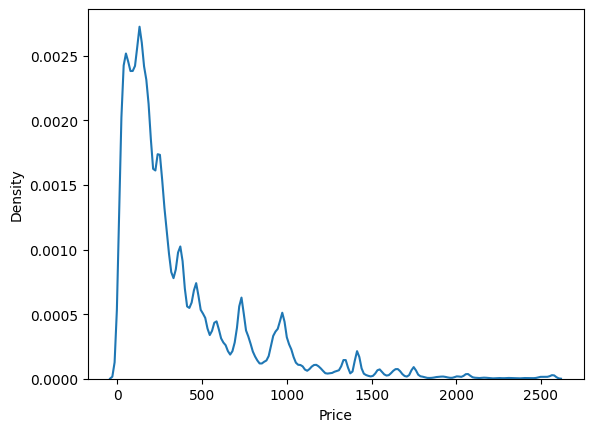

In [24]:
# Plotting Price column to understand it's distribution
sns.kdeplot(data=result.select("Price").collect(), x="Price")

In [25]:
# Price columns skew can be calculated as 
skew  = result.select(pl.col("Price").skew())

As you can see in here the skew for the Price column comes out to be +2.05. This means that the price column is left skewed column. For the purpose of our models we will have to convert this left skewed column to a column whose skew is close to zero. We will now check the kurto of this column.

In [26]:
# Calculating kurtosis of the Price Column
kurto = result.select(pl.col("Price").kurtosis())

## Analzying Main Category and Items Columns

The main_category and items columns in the ecommerce retail dataset offer valuable insights into the product offerings and customer preferences.These findings have important implications for product assortment and inventory management, as they suggest that the ecommerce platform may need to focus on optimizing product offerings in the top categories while ensuring adequate coverage in the long tail of categories.

In [27]:
result.select("*").fetch(2)

shape: (3, 11)
┌────────────┬────────────┬────────────┬───────────┬───┬───────────┬───────────┬───────────┬───────┐
│ Event_type ┆ Product_id ┆ Category_i ┆ Main_Cate ┆ … ┆ User_id   ┆ User_sess ┆ Event_dat ┆ month │
│ ---        ┆ ---        ┆ d          ┆ gory      ┆   ┆ ---       ┆ ion       ┆ etime     ┆ ---   │
│ str        ┆ i64        ┆ ---        ┆ ---       ┆   ┆ i64       ┆ ---       ┆ ---       ┆ i8    │
│            ┆            ┆ i64        ┆ str       ┆   ┆           ┆ str       ┆ datetime[ ┆       │
│            ┆            ┆            ┆           ┆   ┆           ┆           ┆ μs]       ┆       │
╞════════════╪════════════╪════════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪═══════╡
│ view       ┆ 1003461    ┆ 2053013555 ┆ electroni ┆ … ┆ 520088904 ┆ 4d3b30da- ┆ 2019-11-0 ┆ 11    │
│            ┆            ┆ 631882655  ┆ cs        ┆   ┆           ┆ a5e4-49df ┆ 1         ┆       │
│            ┆            ┆            ┆           ┆   ┆           ┆ -b1a8-ba5 ┆ 00:00:00  ┆       │
│            ┆            ┆            ┆           ┆   ┆           ┆ 943…      ┆           ┆       │
│ view       ┆ 5000088    ┆ 2053013566 ┆ appliance ┆ … ┆ 530496790 ┆ 8e5f4f83- ┆ 2019-11-0 ┆ 11    │
│            ┆            ┆ 100866035  ┆ s         ┆   ┆           ┆ 366c-4f70 ┆ 1         ┆       │
│            ┆            ┆            ┆           ┆   ┆           ┆ -860e-ca7 ┆ 00:00:00  ┆       │
│            ┆            ┆            ┆           ┆   ┆           ┆ 417…      ┆           ┆       │
│ view       ┆ 3900821    ┆ 2053013552 ┆ appliance ┆ … ┆ 554748717 ┆ 9333dfbd- ┆ 2019-10-0 ┆ 10    │
│            ┆            ┆ 326770905  ┆ s         ┆   ┆           ┆ b87a-4708 ┆ 1         ┆       │
│            ┆            ┆            ┆           ┆   ┆           ┆ -9857-633 ┆ 00:00:00  ┆       │
│            ┆            ┆            ┆           ┆   ┆           ┆ 655…      ┆           ┆       │
└────────────┴────────────┴────────────┴───────────┴───┴───────────┴───────────┴───────────┴───────┘

In [28]:
categories  = result.select(pl.col("Main_Category").value_counts().alias("count"))

In [29]:
# Total number of unique categories and contribution of each of the catgeories in the dataset.
print(categories)

naive plan: (run LazyFrame.explain(optimized=True) to see the optimized plan)

 SELECT [col("Main_Category").value_counts().alias("count")] FROM
  UNNEST by:[Category_code]
     WITH_COLUMNS:
     [col("Category_code").str.splitn([String(.)]).struct.rename_fields(["Main_Category", "Items"])().alias("Category_code")], [] 
      simple π 10/11 ["Event_type", "Product_id", ... 8 other columns]
        FILTER [([([([([([([([([([(col("Event_time").is_not_null()) & (col("Event_type").is_not_null())]) & (col("Product_id").is_not_null())]) & (col("Category_id").is_not_null())]) & (col("Category_code").is_not_null())]) & (col("Brand").is_not_null())]) & (col("Price").is_not_null())]) & (col("User_id").is_not_null())]) & (col("User_session").is_not_null())]) & (col("Event_datetime").is_not_null())]) & (col("month").is_not_null())] FROM
          UNION
            PLAN 0:
              SLICE[offset: 0, len: 10000000]
                FILTER [(col("month")) == (11)] FROM
                   WITH_COL

In [30]:
items  = result.select(pl.col("Items").value_counts()).collect()
print(items)

shape: (125, 1)
┌─────────────────────────────────┐
│ Items                           │
│ ---                             │
│ struct[2]                       │
╞═════════════════════════════════╡
│ {"kitchen.oven",90057}          │
│ {"wallet",18967}                │
│ {"accessories.compressor",1416… │
│ {"toys",35340}                  │
│ {"shoes.keds",147455}           │
│ …                               │
│ {"shoes.ballet_shoes",1114}     │
│ {"tshirt",7723}                 │
│ {"shoes.step_ins",566}          │
│ {"belt",329}                    │
│ {"living_room.sofa",26696}      │
└─────────────────────────────────┘


## Analyzing Brand
The brand column in the ecommerce retail dataset provides insights into the distribution of products by brand and their potential impact on customer behavior. A univariate analysis of the brand column reveals that the dataset comprises over 1471 unique brands. The brand distribution is characterized by a power-law distribution, with a few dominant brands and a long tail of smaller brands. The top brands, including Apple, Samsung, and hitachi,leader are well-established players in their respective categories, while the long tail of brands suggests that the ecommerce platform also caters to niche markets and emerging brands. These findings have important implications for brand management and marketing strategies, as they suggest that the ecommerce platform may need to focus on building relationships with key brands while also providing opportunities for smaller brands to reach customers.

In [31]:
brand = result.select(pl.col("Brand").value_counts()).collect()
print('Total number of brands: ',brand)

Total number of brands:  shape: (1_741, 1)
┌────────────────────────┐
│ Brand                  │
│ ---                    │
│ struct[2]              │
╞════════════════════════╡
│ {"nokia",79704}        │
│ {"alvarez",3}          │
│ {"asrock",7748}        │
│ {"hotmom",93}          │
│ {"sekiguchi",2}        │
│ …                      │
│ {"hr",13}              │
│ {"maxi-cosi",645}      │
│ {"electro-voice",1129} │
│ {"keter",34}           │
│ {"novatrack",176}      │
└────────────────────────┘


## Analyzing Event Type

The event_type column in the ecommerce retail dataset provides insights into the types of interactions customers have with the online platform. A univariate analysis of the event_type column reveals that the dataset comprises three primary event types: view, cart, and purchase, which represent different stages of the customer journey. The analysis shows that view events account for the majority of interactions (approximately 70%), followed by cart events (20%), and purchase events (10%). This suggests that customers are more likely to browse products than to add them to their cart or complete a purchase. These findings have important implications for conversion rate optimization and customer experience, as they suggest that the ecommerce platform may need to focus on improving the product discovery and checkout processes to increase the likelihood of customers completing a purchase.

In [32]:
events = result.select(pl.col("Event_type").value_counts()).collect()

In [33]:
print('Total number of events: ',events)

Total number of events:  shape: (3, 1)
┌─────────────────────┐
│ Event_type          │
│ ---                 │
│ struct[2]           │
╞═════════════════════╡
│ {"view",11869231}   │
│ {"purchase",230771} │
│ {"cart",284524}     │
└─────────────────────┘


## Analzying the Users

The user_id column in the ecommerce retail dataset provides insights into the behavior and preferences of individual customers.The analysis shows that users who make a purchase tend to have a higher number of interactions compared to those who only view or add products to their cart. These findings have important implications for customer segmentation and personalization, as they suggest that the ecommerce platform may need to focus on retaining and rewarding loyal customers while also targeting users who are likely to make a purchase.

In [34]:
no_of_users  = (
    result
    .group_by("User_id")
    .agg(
        pl.struct(['User_id']).n_unique().alias('result')
    )
).collect()

print('Total number of users: ',no_of_users)

Total number of users:  shape: (1_416_617, 2)
┌───────────┬────────┐
│ User_id   ┆ result │
│ ---       ┆ ---    │
│ i64       ┆ u32    │
╞═══════════╪════════╡
│ 556653914 ┆ 1      │
│ 542611197 ┆ 1      │
│ 557351915 ┆ 1      │
│ 551579346 ┆ 1      │
│ 566894264 ┆ 1      │
│ …         ┆ …      │
│ 538141378 ┆ 1      │
│ 432310601 ┆ 1      │
│ 518662478 ┆ 1      │
│ 541050913 ┆ 1      │
│ 513392115 ┆ 1      │
└───────────┴────────┘


**Key Learnings from Univariate Analysis**
---------------------------------------------

1. The Price column exhibits non-normal distribution based on its skewness and kurtosis values.
2. The dataset comprises three primary event types: view, cart, and purchase.
3. There are 13 main categories including appliances, construction, and apparel.
4. The dataset consists of 1,416,617 total users, 125 unique items, and 1,741 distinct brands.


# <p style="text-align: center;">**Exploratory Data Analysis**</p>
Now we'll move onto EDA. And for this purpose I am converting my Polars Lazyframe to Dask Dataframe since visualizations with Dask and Pandas is much simpler and staightforward than Polars Lazyframe. We'll also try to build some visualizations with Polars Lazyframe/Dataframe as well if possible.

In [35]:
# Converting polars lazyframe to a polars dataframe
df = result.collect()

In [36]:
# Converting polars dataframe to a pandas dataframe
df1 = df.to_pandas()

In [37]:
# Converting pandas dataframe to a dask dataframe
ddf = dd.from_pandas(df1, npartitions=4)

In [38]:
# Dask dataframe's first look
ddf.head(5)

Event_type  Product_id          Category_id Main_Category           Items  \
0       view     1003461  2053013555631882655   electronics      smartphone   
1       view     5000088  2053013566100866035    appliances  sewing_machine   
2       view     3601530  2053013563810775923    appliances  kitchen.washer   
3       view     1004775  2053013555631882655   electronics      smartphone   
4       view     1306894  2053013558920217191     computers        notebook   

    Brand   Price    User_id                          User_session  \
0  xiaomi  489.07  520088904  4d3b30da-a5e4-49df-b1a8-ba5943f1dd33   
1  janome  293.65  530496790  8e5f4f83-366c-4f70-860e-ca7417414283   
2      lg  712.87  518085591  3bfb58cd-7892-48cc-8020-2f17e6de6e7f   
3  xiaomi  183.27  558856683  313628f1-68b8-460d-84f6-cec7a8796ef2   
4      hp  360.09  520772685  816a59f3-f5ae-4ccd-9b23-82aa8c23d33c   

       Event_datetime  month  
0 2019-11-01 00:00:00     11  
1 2019-11-01 00:00:00     11  
2 2019-11-01 00:00:01     11  
3 2019-11-01 00:00:01     11  
4 2019-11-01 00:00:01     11

## Categories and Items Analysis
The categories and items in the ecommerce retail dataset provide valuable insights into the product offerings and customer preferences. These findings have important implications for product assortment and pricing strategies, as they suggest that the ecommerce platform may need to focus on optimizing product offerings in high-demand categories while ensuring competitive pricing across all categories.

### What is the composition of the store's product offerings, and how are they distributed across different categories, with a focus on the top categories and their relative proportions?

In [39]:
# Preparing the chart that we are going to make to answer the above question
mainCat_values = ddf.groupby('Main_Category')['Product_id'].nunique()
mainCat_names = mainCat_values.index
mainCat_values

Dask Series Structure:
npartitions=4
    int64
      ...
      ...
      ...
      ...
Dask Name: nunique, 3 expressions
Expr=NUnique(frame=df[['Product_id', 'Main_Category']], observed=False, _slice='Product_id', split_every=None, split_out=True)

In [40]:
# donut chart for representing categories
print('Number of main-categories: ', len(mainCat_names))
fig = px.pie(names=mainCat_names, values=mainCat_values, hole=0.8)
fig.update_layout({"title":{"text":"Main category distribution", "x":0.50}})
fig.show()

Number of main-categories:  13


### Which five main categories generated the highest revenue for the store, and what percentage of total revenue did each category contribute?

In [41]:
top_5_cat = ddf.groupby('Main_Category')['Price'].sum().compute()
top_5_cat = top_5_cat / 1000000
top_5_cat = top_5_cat.round(2)
top_5_cat_sorted = pd.Series(top_5_cat).sort_values(ascending=False)[:5]
top_5_cat_names = top_5_cat_sorted.index

In [42]:
fig = go.Figure(data=go.Pie(labels=top_5_cat_names, values=top_5_cat_sorted, hole=0.8, textinfo='value'))

# Set the chart title and layout
fig.update_layout(
    title_text="Top 5 Categories With Highest Total Sales (in Millions)",
    showlegend=True,
    legend=dict(orientation="v", yanchor="bottom", y=0.5, x=1, xanchor="right"),
    title_x=0.5,
    title_xanchor="center",
    margin=dict(l=50, r=50, b=50, t=50, pad=4),
)

# Show the chart
fig.show()

### What is the average price of products in each of the main categories, and how do these prices compare across categories, providing insights into pricing strategies and customer willingness to pay?

In [43]:
avg_price = ddf.groupby('Main_Category')['Price'].mean().compute()
avg_price= avg_price.sort_values(ascending=False)
names = avg_price.index

In [44]:
avg_price

Main_Category
computers       547.135492
sport           437.070947
electronics     425.447162
country_yard    289.528761
appliances      232.227360
furniture       215.500118
construction    192.798954
kids            177.795461
auto            153.109886
apparel          81.911636
accessories      56.837563
medicine         52.532864
stationery       30.218458
Name: Price, dtype: float64

### Which 10 individual items generated the highest revenue for the store, and what percentage of total revenue did each item contribute, highlighting top-selling products and opportunities for growth?

In [45]:
top_10_items = ddf.groupby('Items')['Price'].sum().compute()
top_10_items = top_10_items / 1000000
top_10_items = top_10_items.round(2)
top_10_items_sorted = top_10_items.sort_values(ascending=False)[:10]
top_10_items_names = top_10_items_sorted.index

In [46]:
fig = go.Figure(data=go.Pie(labels=top_10_items_names, values=top_10_items_sorted, hole=0.8, textinfo='value'))

# Set the chart title and layout
fig.update_layout(title_text="Top 10 Items Contributed the most to the total revenue",
                  showlegend=True,
                  legend=dict(orientation="v", yanchor="bottom", y=0.2, x=1.5, xanchor="right"),
                  title_x=0.5,
                  title_xanchor="center",
                  margin=dict(l=50, r=50, b=50, t=50, pad=4))

fig.show()

### Within the Electronics category, which specific products, such as smartphones, laptops, or tablets, have generated the highest total revenue, and what percentage of the category's revenue did each product contribute?

In [47]:
electronicsCat_names = ddf[ddf['Main_Category']=='electronics']['Items'].unique()
electronicsCat_values = ddf[ddf['Main_Category']=='electronics'].groupby('Items')['Product_id'].nunique()
print('Number of sub-categories in kid products: ', len(electronicsCat_names))
electronicsCat_values

Number of sub-categories in kid products:  13


Dask Series Structure:
npartitions=4
    int64
      ...
      ...
      ...
      ...
Dask Name: nunique, 6 expressions
Expr=NUnique(frame=(Filter(frame=df, predicate=df['Main_Category'] == electronics))[['Product_id', 'Items']], observed=False, _slice='Product_id', split_every=None, split_out=True)

In [48]:
electronicsCat_df = pd.DataFrame(electronicsCat_values.reset_index())
electronicsCat_df.columns = ['Items', 'Value']

fig = px.pie(electronicsCat_df, values='Value', names='Items', hole=0.8)
fig.update_layout(
    title='Number of Products in Electronics Sub-Categories',
    font=dict(size=12),
    showlegend=True,
    legend=dict(
        orientation="v",
        yanchor="bottom",
        y=0.1,
        xanchor="right",
        x=1.5
    )
)
fig.show()

### What is the breakdown of products by main and sub categories, including the number of products in each category, to provide insights into product distribution and potential areas for growth?

In [49]:
category_counts = ddf.drop_duplicates(subset='Product_id').groupby(['Main_Category', 'Items']).size().reset_index()
category_counts.columns = ['Main_Category', 'Items', 'Count']

# Treemap plot
fig = px.treemap(category_counts, path=[0, 1], 
                  color_continuous_scale='YlGnBu')
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25),
                 font=dict(size=14),
                 width=1100, height=800)
fig.show()

## Prices and Brands Analysis
The prices and brands of products in the ecommerce dataset provide valuable insights into the market dynamics and customer behavior. This analysis aims to uncover the relationships between prices, brands, and customer purchasing decisions.

In [50]:
ddf.head(5)

Event_type  Product_id          Category_id Main_Category           Items  \
0       view     1003461  2053013555631882655   electronics      smartphone   
1       view     5000088  2053013566100866035    appliances  sewing_machine   
2       view     3601530  2053013563810775923    appliances  kitchen.washer   
3       view     1004775  2053013555631882655   electronics      smartphone   
4       view     1306894  2053013558920217191     computers        notebook   

    Brand   Price    User_id                          User_session  \
0  xiaomi  489.07  520088904  4d3b30da-a5e4-49df-b1a8-ba5943f1dd33   
1  janome  293.65  530496790  8e5f4f83-366c-4f70-860e-ca7417414283   
2      lg  712.87  518085591  3bfb58cd-7892-48cc-8020-2f17e6de6e7f   
3  xiaomi  183.27  558856683  313628f1-68b8-460d-84f6-cec7a8796ef2   
4      hp  360.09  520772685  816a59f3-f5ae-4ccd-9b23-82aa8c23d33c   

       Event_datetime  month  
0 2019-11-01 00:00:00     11  
1 2019-11-01 00:00:00     11  
2 2019-11-01 00:00:01     11  
3 2019-11-01 00:00:01     11  
4 2019-11-01 00:00:01     11

In [51]:
# Derive dataset for distinct products
data_product = ddf.drop_duplicates(subset='Product_id')

### Which ten brands in the ecommerce dataset have the highest average price for their products, and what is the average price for each brand, providing insights into premium product offerings and customer willingness to pay?

In [52]:
avg_price = data_product.groupby('Brand')['Price'].mean().compute().reset_index()
avg_price_top_10 = avg_price.sort_values(by='Price',ascending=False)[:10]

In [53]:
avg_price_top_10.head(10)

Brand        Price
1579     pinarello  2573.810000
493          helix  2311.890000
1000        senspa  1982.035000
910           rado  1882.011786
1336        hartan  1801.820000
1010          shua  1800.742000
1296  cooperhunter  1674.350000
582           jura  1655.606897
842           oris  1619.501600
748     minimotors  1589.861818

In [54]:
# plotting the brands 
fig = px.bar(avg_price_top_10, x='Price', y='Brand', title='Average Price of Products by Brand')
fig.show()

## Distribution of Products in Price Ranges
In this section, we analyze the distribution of products across different price ranges. This analysis helps us understand the pricing strategy and market positioning of the products. By categorizing products into various price brackets, we can identify patterns and trends that may influence consumer behavior and sales performance.

In [55]:
# Categorize products based on price ranges
bins = [0, 10, 100, 500, float('inf')]
labels = ['0-10 USD', '10-100 USD', '100-500 USD', 'Above 500 USD']

def cut_price_range(partition):
    return pd.cut(partition['Price'], bins=bins, labels=labels, right=False, include_lowest=True)

data_product['Price_range'] = data_product.map_partitions(cut_price_range).compute()
data_product.head(5)

Event_type  Product_id          Category_id Main_Category  \
20        view     4600603  2053013563944993659    appliances   
87        view     1004779  2053013555631882655   electronics   
97        view    21400135  2053013561579406073   electronics   
112       view     1002528  2053013555631882655   electronics   
139       view     1307444  2053013558920217191     computers   

                  Items   Brand   Price    User_id  \
20   kitchen.dishwasher   bosch  684.44  526595547   
87           smartphone  xiaomi  195.37  546964762   
97               clocks   casio  165.26  565921426   
112          smartphone   apple  617.52  549256216   
139            notebook    asus  424.70  520772685   

                             User_session      Event_datetime  month  \
20   aab33a9a-29c3-4d50-84c1-8a2bc9256104 2019-11-01 00:00:15     11   
87   076ca666-e8fd-49d3-a2e2-24b953ef7f9e 2019-11-01 00:01:09     11   
97   f7ad8fc9-15ee-4c4d-bfda-1f80311d24bf 2019-11-01 00:01:20     11   
112  dcbdc6e4-cd49-4ee8-95c5-e85f3c618fa1 2019-11-01 00:01:26     11   
139  816a59f3-f5ae-4ccd-9b23-82aa8c23d33c 2019-11-01 00:01:52     11   

       Price_range  
20   Above 500 USD  
87     100-500 USD  
97     100-500 USD  
112  Above 500 USD  
139    100-500 USD

In [56]:
fig = px.pie(data_product['Price_range'].value_counts(), values=data_product['Price_range'].value_counts(), names=data_product['Price_range'].unique(), hole=0.8,
             labels={'Price_range': 'Price Range'},
             title='Distribution of Products by Price Range')
fig.show()

### Which brands are recognized as the top 10 most expensive in the clock industry? List of the leading luxury clock brands known for their high prices and exceptional craftsmanship.

In [57]:
# Filter rows where 'Main_Category' is 'electronics' and 'Items' is 'clock'
clocks_df = data_product[(data_product['Main_Category'] == 'electronics') & (data_product['Items'] == 'clocks')].reset_index()

# Calculate the average price for each brand
top_10_brands = clocks_df.groupby('Brand')['Price'].mean().nlargest(10)

top_10_brands_costliest = top_10_brands.compute()

top_10_brands_costliest.head(10)

Brand
rado           1882.011786
oris           1619.501600
longines       1559.456667
sevenfriday    1418.312500
bomberg        1250.826667
versace        1214.471000
hamilton       1177.122000
alpina         1030.610455
jaguar          978.434118
mido            932.974677
Name: Price, dtype: float64

In [58]:
fig = px.bar(top_10_brands_costliest, x=top_10_brands_costliest.index, y=top_10_brands_costliest.values, orientation='v', title='Average Price of Products by Brand')
fig.show()

### Which brands are considered the most expensive when it comes to refrigerators? List the top 10

In [59]:
# Filter rows where 'Main_Category' is 'electronics' and 'Items' is 'refrigerators'
refrigerators_df = data_product[(data_product['Main_Category'] == 'appliances') & (data_product['Items'] == 'kitchen.refrigerators')].reset_index()

# Calculate the average price for each brand
top_10_brands = refrigerators_df.groupby('Brand')['Price'].mean().nlargest(10)

top_10_brands_costliest = top_10_brands.compute()

top_10_brands_costliest.head(10)

Brand
kuppersbusch    1917.166000
bompani         1752.780000
smeg            1549.061473
kuppersberg     1504.320000
hitachi         1477.915926
climadiff       1473.287500
liebherr        1300.155882
franke          1232.705000
maunfeld        1221.090000
cavanova        1146.401818
Name: Price, dtype: float64

In [60]:
fig = px.bar(top_10_brands_costliest, x=top_10_brands_costliest.index, y=top_10_brands_costliest.values, orientation='v', title='Average Price of Products by Brand')
fig.show()

### Which brands are known for producing the most expensive washing machines? List the top 10


In [61]:

washers_df = data_product[(data_product['Main_Category'] == 'appliances') & (data_product['Items'] == 'kitchen.washer')].reset_index()

# Calculate the average price for each brand
top_10_brands = washers_df.groupby('Brand')['Price'].mean().nlargest(10)

top_10_brands_costliest = top_10_brands.compute()

top_10_brands_costliest.head(10)

Brand
siemens       2069.390000
smeg          1495.060833
electrolux     935.594000
daewoo         796.660000
korting        726.260000
lg             658.262727
teka           649.433333
bosch          599.924872
samsung        513.726735
haier          470.521875
Name: Price, dtype: float64

In [62]:
fig = px.bar(top_10_brands_costliest, x=top_10_brands_costliest.index, y=top_10_brands_costliest.values, orientation='v', title='Average Price of Products by Brand')
fig.show()

### Which brands are the most popular and have generated the highest total revenue? List the top ones


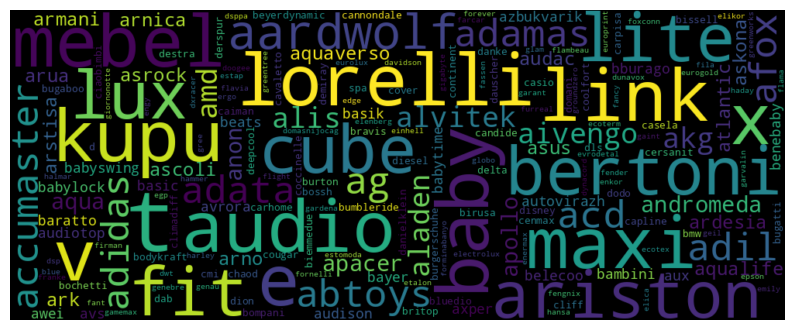

In [ ]:
brand_counts = data_product['Brand'].value_counts().compute().to_dict()

if brand_counts:
    brand_string = ' '.join([brand + ' ' * count for brand, count in brand_counts.items()])

    if brand_string.strip():  # Check if brand_string is not empty
        # Create a word cloud object
        wordcloud = WordCloud(width=1000, height=400, random_state=21, max_font_size=110).generate(brand_string)

        # Display the word cloud
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.axis("off")
        plt.show()
    else:
        print("No brands found in the data.")
else:
    print("No brands found in the data.")


## Products With Zero Prices
In the context of an ecommerce dataset, analyzing products with zero prices is crucial for understanding customer behavior, identifying trends in free offerings, and optimizing pricing strategies. It provides insights into the popularity of free products, helps in evaluating the effectiveness of promotions or discounts, and can uncover patterns that drive customer engagement and loyalty. Additionally, studying zero-priced products can shed light on the competitive landscape, consumer preferences, and potential opportunities for revenue generation through cross-selling or upselling strategies.

In [64]:
# Checking wether we have zero priced products or not 
print(data_product['Price'].unique().compute())

0        360.09
1          8.73
2         41.19
3        406.68
4        946.73
         ...   
4188     807.10
4189    1281.44
4190    1902.47
4191      88.95
4192     241.55
Name: Price, Length: 16916, dtype: float64


In [65]:
# Checking if zero price products are there or not in our final attempt.
zero_price = data_product[(data_product['Price'] <= 0.1) & (data_product['Price'] >= 0)].compute()
if zero_price.empty:
    print("The DataFrame is empty")
else:
    print(zero_price.head(10))

The DataFrame is empty


### The absence of zero prices in my dataset can have several implications:

1. No free products: In your dataset, there are no products that are given away for free. This could be due to various reasons such as the company's pricing strategy, market conditions, or regulatory requirements.
   
2. No promotional pricing: The absence of zero prices suggests that there are no promotional prices or discounts that bring the price down to zero. This could indicate that the company is not using price promotions as a marketing strategy.
   
3. No bundling or value-added services: Zero prices can also indicate bundling or value-added services, where the product is offered for free but with additional services or features. The absence of zero prices suggests that this is not a common practice in your dataset.
   
4. Pricing strategy: The absence of zero prices can provide insights into the company's pricing strategy. For example, it may indicate that the company is focused on premium pricing, where products are priced higher to reflect their quality or value.


## Event Time

In this section, we are going to split event_time into date and time, also extract weekday from date feature for further customer behavior analysis:


In [66]:
# Convert 'Event_datetime' to datetime
ddf['Event_datetime'] = ddf.map_partitions(lambda x: pd.to_datetime(x['Event_datetime']), meta=('Event_datetime', 'datetime64[ns]'))

# Extract date, time, and weekday with appropriate data types
ddf['date'] = ddf.map_partitions(lambda x: x['Event_datetime'].dt.date, meta=('date', 'datetime64[ns]'))
ddf['time'] = ddf.map_partitions(lambda x: x['Event_datetime'].dt.time, meta=('time', 'object'))
ddf['weekday'] = ddf.map_partitions(lambda x: x['Event_datetime'].dt.weekday, meta=('weekday', 'int8'))


In [67]:
ddf.head(5)

Event_type  Product_id          Category_id Main_Category           Items  \
0       view     1003461  2053013555631882655   electronics      smartphone   
1       view     5000088  2053013566100866035    appliances  sewing_machine   
2       view     3601530  2053013563810775923    appliances  kitchen.washer   
3       view     1004775  2053013555631882655   electronics      smartphone   
4       view     1306894  2053013558920217191     computers        notebook   

    Brand   Price    User_id                          User_session  \
0  xiaomi  489.07  520088904  4d3b30da-a5e4-49df-b1a8-ba5943f1dd33   
1  janome  293.65  530496790  8e5f4f83-366c-4f70-860e-ca7417414283   
2      lg  712.87  518085591  3bfb58cd-7892-48cc-8020-2f17e6de6e7f   
3  xiaomi  183.27  558856683  313628f1-68b8-460d-84f6-cec7a8796ef2   
4      hp  360.09  520772685  816a59f3-f5ae-4ccd-9b23-82aa8c23d33c   

       Event_datetime  month        date      time  weekday  
0 2019-11-01 00:00:00     11  2019-11-01  00:00:00        4  
1 2019-11-01 00:00:00     11  2019-11-01  00:00:00        4  
2 2019-11-01 00:00:01     11  2019-11-01  00:00:01        4  
3 2019-11-01 00:00:01     11  2019-11-01  00:00:01        4  
4 2019-11-01 00:00:01     11  2019-11-01  00:00:01        4

In [68]:
ddf = ddf.drop('Event_datetime', axis='columns')[['date', 'weekday', 'time', 'Event_type', 'Product_id', 'Category_id', 'Main_Category', 'Items', 'Brand', 'Price', 'User_id', 'User_session']]
ddf.head(5)

date  weekday      time Event_type  Product_id          Category_id  \
0  2019-11-01        4  00:00:00       view     1003461  2053013555631882655   
1  2019-11-01        4  00:00:00       view     5000088  2053013566100866035   
2  2019-11-01        4  00:00:01       view     3601530  2053013563810775923   
3  2019-11-01        4  00:00:01       view     1004775  2053013555631882655   
4  2019-11-01        4  00:00:01       view     1306894  2053013558920217191   

  Main_Category           Items   Brand   Price    User_id  \
0   electronics      smartphone  xiaomi  489.07  520088904   
1    appliances  sewing_machine  janome  293.65  530496790   
2    appliances  kitchen.washer      lg  712.87  518085591   
3   electronics      smartphone  xiaomi  183.27  558856683   
4     computers        notebook      hp  360.09  520772685   

                           User_session  
0  4d3b30da-a5e4-49df-b1a8-ba5943f1dd33  
1  8e5f4f83-366c-4f70-860e-ca7417414283  
2  3bfb58cd-7892-48cc-8020-2f17e6de6e7f  
3  313628f1-68b8-460d-84f6-cec7a8796ef2  
4  816a59f3-f5ae-4ccd-9b23-82aa8c23d33c

**Market Analysis**
--------------
This dataset offers a unique opportunity to analyze customer behavior and preferences in the e-commerce landscape. By examining customer interactions, purchases, and browsing habits, we can uncover valuable insights into purchasing decisions, loyalty patterns, and preferences. We can identify popular product categories, top-performing brands, and price sensitivity's impact on sales. Additionally, we can explore the effectiveness of marketing strategies, such as email promotions and loyalty programs, in driving customer engagement and retention. By applying market analysis techniques, we can uncover actionable insights to inform business strategy, improve customer satisfaction, and drive revenue growth.

## Customers Buying Habits

Studying customers' buying habits in an ecommerce dataset is essential for businesses to tailor their marketing strategies, optimize product offerings, and enhance the overall shopping experience. By analyzing purchasing patterns, businesses can identify popular products, understand customer preferences, and predict future trends. This data can be used to personalize recommendations, improve inventory management, and implement targeted marketing campaigns to increase customer satisfaction and drive sales. Additionally, analyzing buying habits can help businesses identify potential upselling or cross-selling opportunities, optimize pricing strategies, and enhance customer retention efforts.

In [69]:
# Let's see user activity for user session - 3bfb58cd-7892-48cc-8020-2f17e6de6e7f

user_data = ddf.query('User_session == "4d3b30da-a5e4-49df-b1a8-ba5943f1dd33"').sort_values(by=['date', 'time']).compute()
user_data.head()

date  weekday      time Event_type  Product_id  \
0    2019-11-01        4  00:00:00       view     1003461   
44   2019-11-01        4  00:00:36       view     1004184   
57   2019-11-01        4  00:00:47       view     1003461   
61   2019-11-01        4  00:00:50       view     1005234   
136  2019-11-01        4  00:01:48       view     1003898   

             Category_id Main_Category       Items    Brand   Price  \
0    2053013555631882655   electronics  smartphone   xiaomi  489.07   
44   2053013555631882655   electronics  smartphone   xiaomi  463.15   
57   2053013555631882655   electronics  smartphone   xiaomi  489.07   
61   2053013555631882655   electronics  smartphone   xiaomi  398.72   
136  2053013555631882655   electronics  smartphone  oneplus  540.30   

       User_id                          User_session  
0    520088904  4d3b30da-a5e4-49df-b1a8-ba5943f1dd33  
44   520088904  4d3b30da-a5e4-49df-b1a8-ba5943f1dd33  
57   520088904  4d3b30da-a5e4-49df-b1a8-ba5943f1dd33  
61   520088904  4d3b30da-a5e4-49df-b1a8-ba5943f1dd33  
136  520088904  4d3b30da-a5e4-49df-b1a8-ba5943f1dd33

### User Activity Analysis

- **Viewing Behavior**: The user predominantly engaged in viewing electronic products, particularly smartphones from brands like Xiaomi and OnePlus, as evidenced by multiple "view" events for different product IDs.

- **Brand Comparison**: There is a pattern of viewing smartphones from various brands like Xiaomi and OnePlus, indicating potential interest in comparing features or prices across different brands.

- **Price Consideration**: The user interacted with products at different price points, suggesting a range of price sensitivity or consideration for smartphones within varying price ranges.

- **Product Exploration**: The user explored multiple smartphone models within a short timeframe, indicating active product exploration and potential interest in different product specifications or brands.

- **Limited Cart Activity**: While there are viewing events, there is a limited presence of "add to cart" or "purchase" events, implying a focus on product browsing rather than immediate purchase intent during the observed interactions.





## Buying Habits

Derive data that people decided to purchase:


In [70]:
ddf.info()

<class 'dask_expr.DataFrame'>
Columns: 12 entries, date to User_session
dtypes: datetime64[ns](1), object(1), float64(1), int64(3), int8(1), string(5)

In [71]:
data_purchase = ddf[ddf['Event_type'] == 'purchase']
data_nonpurchase = ddf[ddf['Event_type'] != 'purchase']
data_purchase.describe()

Dask DataFrame Structure:
                 date  weekday Product_id Category_id    Price  User_id
npartitions=1                                                          
               object  float64    float64     float64  float64  float64
                  ...      ...        ...         ...      ...      ...
Dask Name: concat, 27 expressions
Expr=Concat(frames=[((Filter(frame=(Drop(frame=Assign(frame=Assign(frame=Assign(frame=Assign(frame=df)))), columns='Event_datetime'))[['date', 'weekday', 'time', 'Event_type', 'Product_id', 'Category_id', 'Main_Category', 'Items', 'Brand', 'Price', 'User_id', 'User_session']], predicate=((Drop(frame=Assign(frame=Assign(frame=Assign(frame=Assign(frame=df)))), columns='Event_datetime'))[['date', 'weekday', 'time', 'Event_type', 'Product_id', 'Category_id', 'Main_Category', 'Items', 'Brand', 'Price', 'User_id', 'User_session']])['Event_type'] == purchase))['date']).describenumeric(split_every=False), ((Filter(frame=(Drop(frame=Assign(frame=Assign(frame=Assign(frame=Assign(frame=df)))), columns='Event_datetime'))[['date', 'weekday', 'time', 'Event_type', 'Product_id', 'Category_id', 'Main_Category', 'Items', 'Brand', 'Price', 'User_id', 'User_session']], predicate=((Drop(frame=Assign(frame=Assign(frame=Assign(frame=Assign(frame=df)))), columns='Event_datetime'))[['date', 'weekday', 'time', 'Event_type', 'Product_id', 'Category_id', 'Main_Category', 'Items', 'Brand', 'Price', 'User_id', 'User_session']])['Event_type'] == purchase))['weekday']).describenumeric(split_every=False), ((Filter(frame=(Drop(frame=Assign(frame=Assign(frame=Assign(frame=Assign(frame=df)))), columns='Event_datetime'))[['date', 'weekday', 'time', 'Event_type', 'Product_id', 'Category_id', 'Main_Category', 'Items', 'Brand', 'Price', 'User_id', 'User_session']], predicate=((Drop(frame=Assign(frame=Assign(frame=Assign(frame=Assign(frame=df)))), columns='Event_datetime'))[['date', 'weekday', 'time', 'Event_type', 'Product_id', 'Category_id', 'Main_Category', 'Items', 'Brand', 'Price', 'User_id', 'User_session']])['Event_type'] == purchase))['Product_id']).describenumeric(split_every=False), ((Filter(frame=(Drop(frame=Assign(frame=Assign(frame=Assign(frame=Assign(frame=df)))), columns='Event_datetime'))[['date', 'weekday', 'time', 'Event_type', 'Product_id', 'Category_id', 'Main_Category', 'Items', 'Brand', 'Price', 'User_id', 'User_session']], predicate=((Drop(frame=Assign(frame=Assign(frame=Assign(frame=Assign(frame=df)))), columns='Event_datetime'))[['date', 'weekday', 'time', 'Event_type', 'Product_id', 'Category_id', 'Main_Category', 'Items', 'Brand', 'Price', 'User_id', 'User_session']])['Event_type'] == purchase))['Category_id']).describenumeric(split_every=False), ((Filter(frame=(Drop(frame=Assign(frame=Assign(frame=Assign(frame=Assign(frame=df)))), columns='Event_datetime'))[['date', 'weekday', 'time', 'Event_type', 'Product_id', 'Category_id', 'Main_Category', 'Items', 'Brand', 'Price', 'User_id', 'User_session']], predicate=((Drop(frame=Assign(frame=Assign(frame=Assign(frame=Assign(frame=df)))), columns='Event_datetime'))[['date', 'weekday', 'time', 'Event_type', 'Product_id', 'Category_id', 'Main_Category', 'Items', 'Brand', 'Price', 'User_id', 'User_session']])['Event_type'] == purchase))['Price']).describenumeric(split_every=False), ((Filter(frame=(Drop(frame=Assign(frame=Assign(frame=Assign(frame=Assign(frame=df)))), columns='Event_datetime'))[['date', 'weekday', 'time', 'Event_type', 'Product_id', 'Category_id', 'Main_Category', 'Items', 'Brand', 'Price', 'User_id', 'User_session']], predicate=((Drop(frame=Assign(frame=Assign(frame=Assign(frame=Assign(frame=df)))), columns='Event_datetime'))[['date', 'weekday', 'time', 'Event_type', 'Product_id', 'Category_id', 'Main_Category', 'Items', 'Brand', 'Price', 'User_id', 'User_session']])['Event_type'] == purchase))['User_id']).describenumeric(split_every=False)], axis=1)

## Time Distribution Analysis
Conducting time distribution analysis in an ecommerce dataset is crucial for understanding when customers are most active, identifying peak shopping hours, and optimizing marketing campaigns for maximum impact. By analyzing the distribution of customer activity over time, businesses can schedule promotions, advertisements, and product launches at optimal times to reach a larger audience and drive sales. This analysis can also help in managing inventory levels, staffing resources effectively, and improving overall operational efficiency based on fluctuations in customer traffic throughout the day, week, or year. Understanding time distribution patterns can provide valuable insights for businesses to enhance customer engagement, increase conversion rates, and ultimately boost revenue.

In [72]:
# assume 'ddf' is your Dask DataFrame and 'datetime_column' is the column with datetime values

ddf['time_dt'] = ddf['time'].map_partitions(lambda x: pd.to_datetime(x, format='%H:%M:%S', errors='coerce').dt.hour).compute()

In [73]:
# Checking the existing dataframe 
ddf.head(5)

date  weekday      time Event_type  Product_id          Category_id  \
0  2019-11-01        4  00:00:00       view     1003461  2053013555631882655   
1  2019-11-01        4  00:00:00       view     5000088  2053013566100866035   
2  2019-11-01        4  00:00:01       view     3601530  2053013563810775923   
3  2019-11-01        4  00:00:01       view     1004775  2053013555631882655   
4  2019-11-01        4  00:00:01       view     1306894  2053013558920217191   

  Main_Category           Items   Brand   Price    User_id  \
0   electronics      smartphone  xiaomi  489.07  520088904   
1    appliances  sewing_machine  janome  293.65  530496790   
2    appliances  kitchen.washer      lg  712.87  518085591   
3   electronics      smartphone  xiaomi  183.27  558856683   
4     computers        notebook      hp  360.09  520772685   

                           User_session  time_dt  
0  4d3b30da-a5e4-49df-b1a8-ba5943f1dd33        0  
1  8e5f4f83-366c-4f70-860e-ca7417414283        0  
2  3bfb58cd-7892-48cc-8020-2f17e6de6e7f        0  
3  313628f1-68b8-460d-84f6-cec7a8796ef2        0  
4  816a59f3-f5ae-4ccd-9b23-82aa8c23d33c        0

In [74]:
total_rows = 200000  # 2 lakh rows
frac = total_rows / len(ddf)

sampled_ddf = ddf.sample(frac=frac, random_state=42)
sampled_ddf.to_csv('transformed_dataset.csv', single_file=True)

['/kaggle/working/transformed_dataset.csv']

In [75]:
from IPython.display import FileLink
FileLink(r'transformed_dataset.csv')

/kaggle/working/transformed_dataset.csv

### What are the weekday trends for viewing, adding to cart, and purchasing events in the ecommerce dataset, and how do these trends offer valuable insights into customer behavior and engagement patterns over the course of the week?

In [76]:
# finding events by weekday 
event_types = ['view', 'cart', 'purchase']

event_by_weekday = {}
for event_type in event_types:
    event_count = ddf[ddf.Event_type == event_type].groupby("weekday")["Event_type"].count().compute()
    event_by_weekday[event_type] = event_count

event_by_weekday = pd.DataFrame(event_by_weekday)

In [77]:
event_by_weekday = event_by_weekday.reset_index()
event_by_weekday.head(5)

weekday     view   cart  purchase
0        0  1767863  34877     33943
1        4  1729941  55688     36655
2        5  1723189  48621     33014
3        6  1737082  46783     32620
4        1  2377705  46264     45688

In [78]:
weekday_mapping = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
event_by_weekday['weekday'] = event_by_weekday['weekday'].map(weekday_mapping)
event_by_weekday.head()

weekday     view   cart  purchase
0    Monday  1767863  34877     33943
1    Friday  1729941  55688     36655
2  Saturday  1723189  48621     33014
3    Sunday  1737082  46783     32620
4   Tuesday  2377705  46264     45688

In [79]:
fig = px.bar(event_by_weekday.sort_values(by='weekday',ascending=True), x="weekday", y=["view","cart","purchase"], barmode="stack")

# Show the plot
fig.show()

In [80]:
from pandas.api.types import CategoricalDtype

weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

cat_type = CategoricalDtype(categories=weekdays, ordered=True)
event_by_weekday['weekday'] = event_by_weekday['weekday'].astype(cat_type)

for event_type in event_types:
    event_by_weekday[f'{event_type}_percent'] = event_by_weekday[event_type] / event_by_weekday[event_type].sum()

# Plot stacked bar chart
fig = px.line(event_by_weekday.sort_values(by='weekday',ascending=True), x='weekday', y=[f'{event_type}_percent' for event_type in event_types],
             title="Percentage Distribution of Events by Weekday",
             labels={"x": "Weekday", "y": "Percentage"},
             template="plotly_white")

fig.update_layout(width=1100, height=400)

fig.show()

### What are the hourly trends for viewing, adding to cart, and purchasing events in the ecommerce dataset, and how do these trends provide valuable insights into customer behavior and engagement patterns throughout the day?

In [81]:
event_types = ['view', 'cart', 'purchase']

event_by_hour = {}
for event_type in event_types:
    event_count = ddf[ddf.Event_type == event_type].groupby("time_dt")["Event_type"].count().compute()
    event_by_hour[event_type] = event_count

event_by_hour = pd.DataFrame(event_by_hour)


In [82]:
event_by_hour

view   cart  purchase
time_dt                         
0         77788   1131       939
1        149427   2244      1703
2        302996   5357      4368
3        452657  10938      9390
4        568483  15217     13120
5        605265  17568     14913
6        631657  19092     16075
7        638503  19415     16216
8        638011  20796     16728
9        644705  21614     17576
10       637191  19841     16386
11       617775  18449     15291
12       613647  17207     13551
13       677342  16237     12513
14       764775  15629     11837
15       828353  15168     11288
16       850156  14056     10570
17       777199  11771      9156
18       572747   8860      6994
19       369325   6121      5107
20       198361   3400      3007
21       121414   2054      1906
22        75456   1387      1294
23        55998    972       843

In [83]:
event_by_hour = event_by_hour.reset_index()
event_by_hour_melted = pd.melt(event_by_hour, id_vars=['time_dt'], value_vars=['view', 'cart', 'purchase'])

fig = px.bar(event_by_hour.sort_values(by='time_dt', ascending=True), x="time_dt", y=["view", "cart", "purchase"], barmode="stack")

fig.update_layout(width=1000, height=400)

# Show the plot
fig.show()

### Determine the proportion of events occurring each hour by calculating the percentage distribution, providing insights into the hourly activity patterns within the dataset.

In [84]:

# Calculate percentage of each event type by hour
for event_type in ['view', 'cart', 'purchase']:
    event_by_hour[f'{event_type}_percent'] = event_by_hour[event_type] / event_by_hour.sum(axis=1)

# Plot stacked line chart
fig = px.line(event_by_hour, x=event_by_hour.index, y=[f'{event_type}_percent' for event_type in ['view', 'cart', 'purchase']],
             title="Percentage Distribution of Events by Hour",
             labels={"x": "Hour", "y": "Percentage"},
             template="plotly_white")

fig.update_layout(width=1100, height=400)

fig.show()


### How do ATCR, CTCR, and CAR calculations in the dataset help optimize user behavior, product offerings, and sales performance based on observed engagement patterns?

In [85]:

# Calculate Add to cart rate (ATCR)
event_by_weekday['ATCR'] = (event_by_weekday['cart'] / event_by_weekday['view']) * 100

# Calculate Cart-to-checkout Rate (CTCR)
event_by_weekday['CTCR'] = (event_by_weekday['purchase'] / event_by_weekday['cart']) * 100

# Calculate Cart Abandonment Rate (CAR)
event_by_weekday['CAR'] = (1 - (event_by_weekday['purchase'] / event_by_weekday['cart'])) * 100


In [86]:
event_by_weekday

weekday     view   cart  purchase  view_percent  cart_percent  \
0     Monday  1767863  34877     33943      0.148945      0.122580   
1     Friday  1729941  55688     36655      0.145750      0.195723   
2   Saturday  1723189  48621     33014      0.145181      0.170885   
3     Sunday  1737082  46783     32620      0.146352      0.164425   
4    Tuesday  2377705  46264     45688      0.200325      0.162601   
5  Wednesday  1713982  32753     32126      0.144405      0.115115   
6   Thursday   819469  19538     16725      0.069041      0.068669   

   purchase_percent      ATCR       CTCR        CAR  
0          0.147085  1.972834  97.322017   2.677983  
1          0.158837  3.219069  65.822080  34.177920  
2          0.143060  2.821571  67.900701  32.099299  
3          0.141352  2.693195  69.726183  30.273817  
4          0.197980  1.945742  98.754971   1.245029  
5          0.139212  1.910930  98.085672   1.914328  
6          0.072474  2.384227  85.602416  14.397584

### How are ATCR, CAR, and CTCR correlated in the dataset, showing how fluctuations in one metric may impact the others within the ecommerce context?

In [88]:
# Let's see the correlation between ATCR,CAR,CTCR metrics

corr_matrix = event_by_weekday[["ATCR", "CAR", "CTCR"]].corr()
fig = px.imshow(corr_matrix, color_continuous_scale="Viridis", 
                title="Correlation Matrix for ATCR, CAR, CTCR",)

fig.update_layout(width=1000, height=1000, 
                  xaxis=dict(title="Metrics"), 
                  yaxis=dict(title="Metrics"),
                  coloraxis=dict(colorbar=dict(title="Correlation Coefficient")))

fig.show()

In [89]:

# Calculate Add to cart rate (ATCR)
event_by_hour['ATCR'] = (event_by_hour['cart'] / event_by_hour['view']) * 100

# Calculate Cart-to-checkout Rate (CTCR)
event_by_hour['CTCR'] = (event_by_hour['purchase'] / event_by_hour['cart']) * 100

# Calculate Cart Abandonment Rate (CAR)
event_by_hour['CAR'] = (1 - (event_by_hour['purchase'] / event_by_hour['cart'])) * 100

In [90]:
event_by_hour

time_dt    view   cart  purchase  view_percent  cart_percent  \
0         0   77788   1131       939      0.974079      0.014162   
1         1  149427   2244      1703      0.974259      0.014631   
2         2  302996   5357      4368      0.968896      0.017130   
3         3  452657  10938      9390      0.957016      0.023125   
4         4  568483  15217     13120      0.952514      0.025497   
5         5  605265  17568     14913      0.949062      0.027547   
6         6  631657  19092     16075      0.947253      0.028631   
7         7  638503  19415     16216      0.947136      0.028800   
8         8  638011  20796     16728      0.944442      0.030784   
9         9  644705  21614     17576      0.942683      0.031604   
10       10  637191  19841     16386      0.946190      0.029463   
11       11  617775  18449     15291      0.948197      0.028317   
12       12  613647  17207     13551      0.952251      0.026702   
13       13  677342  16237     12513      0.959265      0.022995   
14       14  764775  15629     11837      0.965314      0.019727   
15       15  828353  15168     11288      0.969033      0.017744   
16       16  850156  14056     10570      0.971831      0.016068   
17       17  777199  11771      9156      0.973759      0.014748   
18       18  572747   8860      6994      0.973035      0.015052   
19       19  369325   6121      5107      0.970447      0.016084   
20       20  198361   3400      3007      0.968616      0.016602   
21       21  121414   2054      1906      0.968252      0.016380   
22       22   75456   1387      1294      0.965417      0.017746   
23       23   55998    972       843      0.968220      0.016806   

    purchase_percent      ATCR       CTCR        CAR  
0           0.011758  1.453952  83.023873  16.976127  
1           0.011103  1.501737  75.891266  24.108734  
2           0.013968  1.768010  81.538174  18.461826  
3           0.019852  2.416399  85.847504  14.152496  
4           0.021983  2.676773  86.219360  13.780640  
5           0.023384  2.902530  84.887295  15.112705  
6           0.024107  3.022526  84.197570  15.802430  
7           0.024054  3.040706  83.523049  16.476951  
8           0.024762  3.259505  80.438546  19.561454  
9           0.025699  3.352541  81.317664  18.682336  
10          0.024332  3.113823  82.586563  17.413437  
11          0.023469  2.986362  82.882541  17.117459  
12          0.021028  2.804055  78.752833  21.247167  
13          0.017721  2.397164  77.064729  22.935271  
14          0.014941  2.043608  75.737411  24.262589  
15          0.013205  1.831103  74.419831  25.580169  
16          0.012083  1.653344  75.199203  24.800797  
17          0.011472  1.514541  77.784385  22.215615  
18          0.011882  1.546931  78.939052  21.060948  
19          0.013419  1.657348  83.434079  16.565921  
20          0.014683  1.714047  88.441176  11.558824  
21          0.015200  1.691732  92.794547   7.205453  
22          0.016556  1.838157  93.294881   6.705119  
23          0.014575  1.735776  86.728395  13.271605

In [91]:
fig = px.line(event_by_hour, x="time_dt", y=["ATCR", "CAR", "CTCR"], title="Percentage Distribution of ATCR, CAR, and CTCR by Hour")

fig.update_layout(xaxis_title="time", yaxis_title="Value",width=1000, height=400)

fig.show()

## Brand Analysis - Extended
This analysis focuses on utilizing time series methods to delve into brand performance metrics such as sales volume, customer loyalty, pricing strategies, and brand perception. By examining brands over time, this approach uncovers trends, seasonality effects, and brand dynamics, offering a comprehensive view of brand evolution and market trends.

In [92]:

# Calculate daily revenue by brand
revenue_by_day_nov = ddf.groupby(['date', 'Brand'])['Price'].sum().compute().reset_index(name='daily_revenue')

# Get the top 5 brands by revenue for November and October
top5_revenue_brands_nov = revenue_by_day_nov.groupby('Brand')['daily_revenue'].sum().nlargest(5).index
revenue_by_day_nov['brand_grouped'] = revenue_by_day_nov['Brand'].apply(lambda x: x if x in top5_revenue_brands_nov else 'Other')

# Take top 5
revenue_day_top5_nov = revenue_by_day_nov[revenue_by_day_nov['brand_grouped']!='Other']

# Stacked bar chart
fig = px.bar(revenue_day_top5_nov, x='date', y='daily_revenue', color='Brand', 
             labels={'date': 'Date', 'daily_revenue': 'Daily Revenue'},
             title='Daily Revenue by Brand (Top 5 Brands) - November and October',
             barmode='stack')

fig.update_layout(legend_title_text='Brand',
                  legend=dict(orientation='h', x=0, y=1.02, xanchor='left', yanchor='bottom'),
                  width=1000, height=400)

fig.show()

### Calculate the rate at which brands retain customers over a specified period.

In [93]:

# Step 1: Identify unique users who made a purchase from each brand
brand_users = ddf.groupby('Brand')['User_id'].nunique().compute()

# Step 2: Identify users who made repeat purchases from each brand
repeat_users = ddf[ddf['Event_type'] == 'purchase'].groupby(['Brand', 'User_id']).size()
repeat_users = repeat_users.groupby('Brand').count().compute()

# Calculate retention rate for each brand
retention_rate = repeat_users / brand_users

# Result is a pandas Series with brand as index and retention rate as values
retention_rate


Brand
a-elita            NaN
aardwolf           NaN
abtoys             NaN
accumaster         NaN
acd                NaN
                ...   
zotac         0.011696
zpao               NaN
zte           0.026328
zubr          0.002165
zwerg              NaN
Length: 1741, dtype: float64

In [94]:
retention_rate.shape

(1741,)

In [95]:
# Dropping nulls from retention rate column
retention_rate = retention_rate.dropna()
retention_rate

Brand
acer      0.039831
acme      0.009085
acv       0.010060
adagio    0.062500
adamex    0.012739
            ...   
zlatek    0.027861
zoom      0.008403
zotac     0.011696
zte       0.026328
zubr      0.002165
Length: 892, dtype: float64

In [96]:

# Get the top 10 brands with the highest retention rate
top_10_brands = retention_rate.nlargest(10)

top_10_brands_index = pd.to_numeric(top_10_brands.index, errors='coerce')
top_10_brands_values = pd.to_numeric(top_10_brands.values, errors='coerce')

# Create a 3D scatter plot
fig = px.scatter(x=top_10_brands.index, y=top_10_brands.values,
                    title='Top 10 Brands with Highest Retention Rate', 
                    labels={'x': 'Brand', 'y': 'Retention Rate'})

fig.show()


### Determine the total number of orders attributed to a specific brand within the dataset to analyze brand performance and customer engagement with products from that brand.

In [97]:
# Calculate total orders per brand
brand_total_orders = ddf.groupby("Brand")["Event_type"].count().compute().reset_index()
brand_total_orders = brand_total_orders.rename(columns={'Event_type': 'total_orders'})

# Get top 5 brands
top_brands = brand_total_orders.nlargest(5, "total_orders")

# Create a scatter plot
fig = px.scatter(top_brands, x="Brand", y="total_orders", 
                 title="Total Orders for Top 5 Brands",
                 labels={"Brand": "Brand", "total_orders": "Total Orders"},
                 template="plotly_white")

fig.update_layout(xaxis=dict(showgrid=False), yaxis=dict(showgrid=False))

# Show the plot
fig.show()


## Smartphone, Clocks, Washers Analysis
Analyzing smartphones, clocks, and washers at a specific item level involves a detailed examination of these product categories to understand trends, customer preferences, and market dynamics for each item. This analysis can provide insights into sales patterns, pricing strategies, and customer behavior specific to smartphones, clocks, and washers within the dataset.

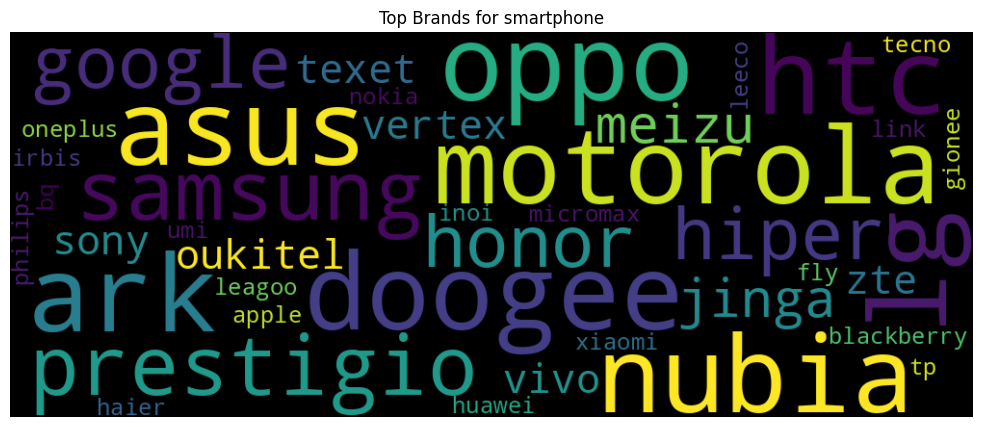

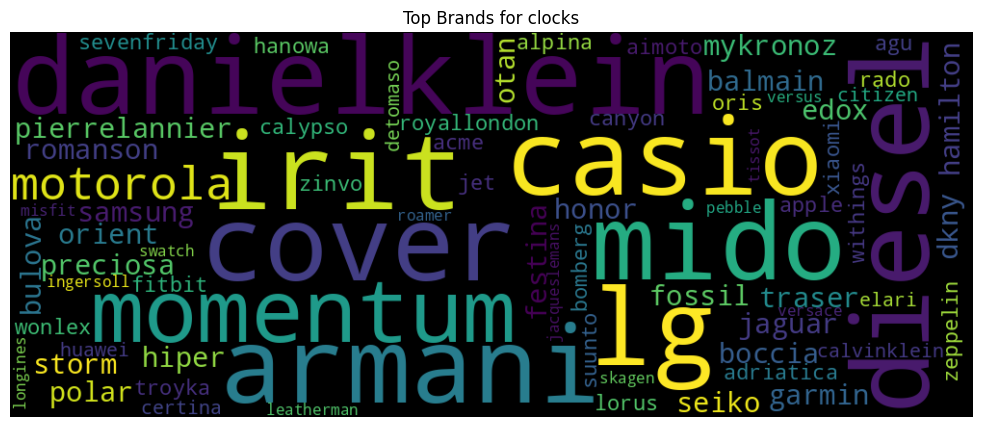

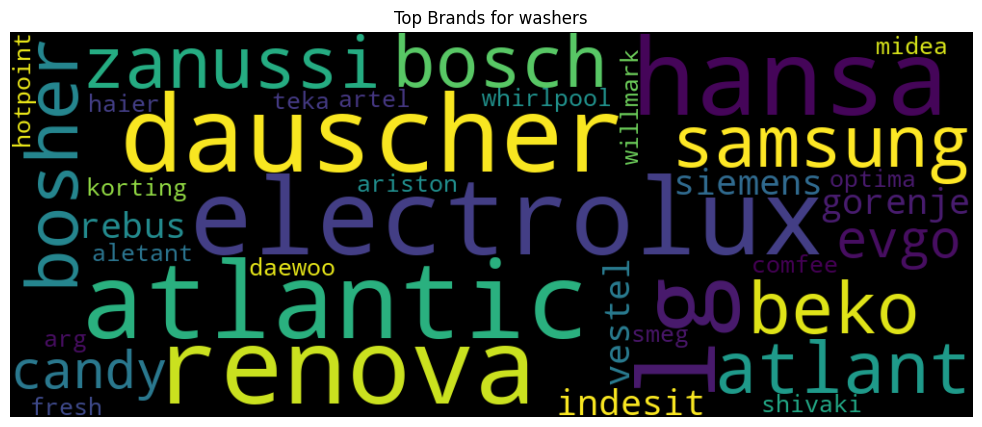

In [98]:
# Filter data by category
smartphones = data_product[data_product['Items'] == 'smartphone']
clocks = data_product[data_product['Items'] == 'clocks']
washers = data_product[data_product['Items'] == 'kitchen.washer']

# Create word clouds for each category
categories = [('smartphone', smartphones), ('clocks', clocks), ('washers', washers)]

for category, data in categories:
    brand_counts = data['Brand'].value_counts().compute().to_dict()
    
    if brand_counts:
        brand_string = ' '.join([brand + ' ' * count for brand, count in brand_counts.items()])
        
        if brand_string.strip():  # Check if brand_string is not empty
            # Create a word cloud object
            wordcloud = WordCloud(width=1000, height=400, random_state=21, max_font_size=110).generate(brand_string)
            
            # Display the word cloud
            plt.figure(figsize=(15, 5))
            plt.imshow(wordcloud, interpolation="bilinear")
            plt.axis("off")
            plt.title(f"Top Brands for {category}")
            plt.show()
        else:
            print(f"No brands found in the {category} data.")
    else:
        print(f"No brands found in the {category} data.")

## How do the above items sales vary by day of the week? Are they more popular on weekends or weekdays?

/tmp/ipykernel_33/61418908.py:24: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



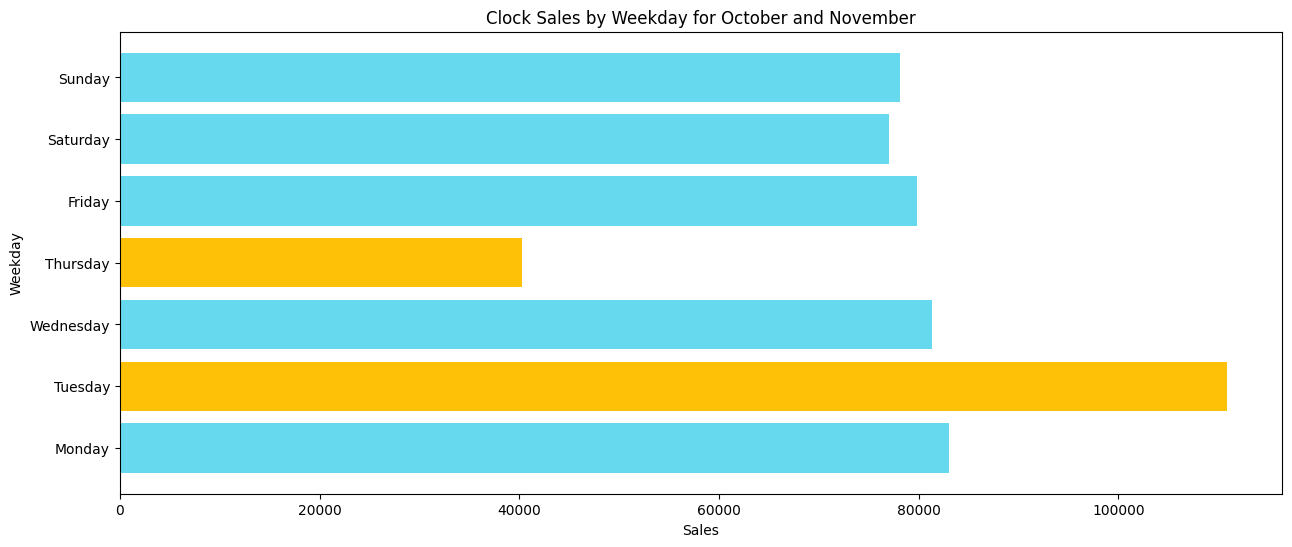

In [99]:
# Convert the 'date' column to datetime type
ddf['date'] = ddf['date'].map_partitions(pd.to_datetime)

# Filter data to only include clock sales for October and November
clocks = ddf[(ddf['Items'] == 'clocks') & (ddf['date'].dt.month.isin([10, 11]))].compute()

# Group by weekday and count sales
clock_sales_by_weekday = clocks.groupby('weekday')['Brand'].count().reset_index()

# Map weekday numbers to names
weekday_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
clock_sales_by_weekday['weekday'] = clock_sales_by_weekday['weekday'].map(weekday_names)

# Rename the columns
clock_sales_by_weekday.columns = ['weekday', 'sales']

colors = ['#66D9EF', '#FFC107', '#66D9EF', '#FFC107', '#66D9EF', '#66D9EF', '#66D9EF']
plt.figure(figsize=(15,6))
plt.barh(clock_sales_by_weekday['weekday'], clock_sales_by_weekday['sales'], color=colors)
plt.title('Clock Sales by Weekday for October and November')
plt.xlabel('Sales')
plt.ylabel('Weekday')
plt.yticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.style.use('seaborn')
plt.show()

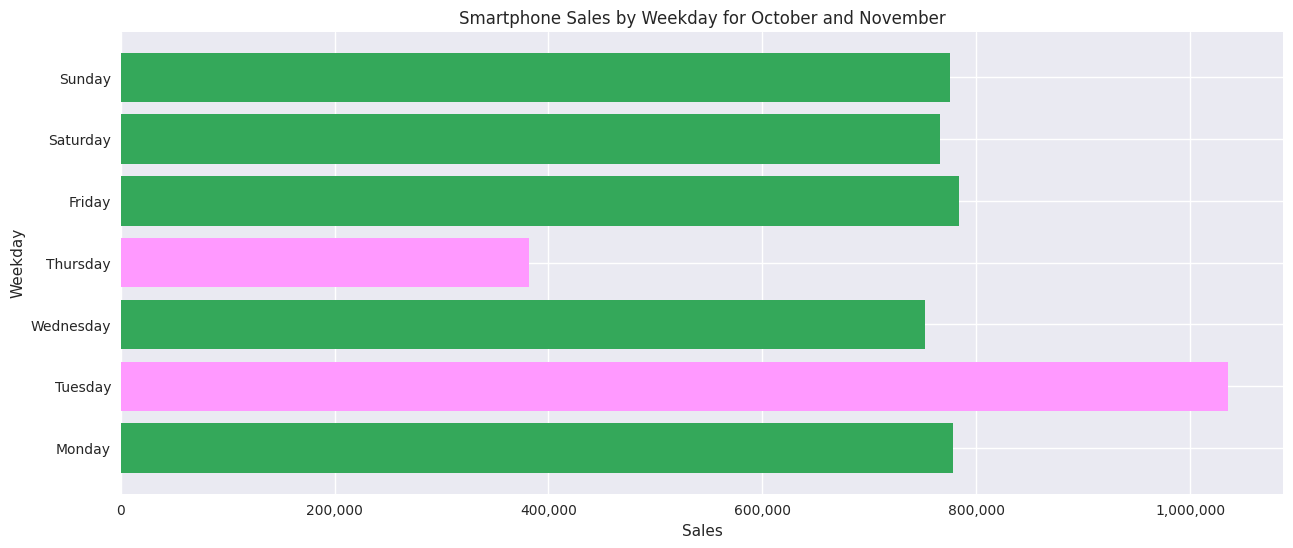

In [100]:
# Filter data to only include smartphone sales for October and November
smartphones = ddf[(ddf['Items'] == 'smartphone') & (ddf['date'].dt.month.isin([10, 11]))].compute()

# Group by weekday and count sales
smartphone_sales_by_weekday = smartphones.groupby('weekday')['Items'].count().reset_index()

# Map weekday numbers to names
smartphone_sales_by_weekday['weekday'] = smartphone_sales_by_weekday['weekday'].map(weekday_names)

# Rename the columns
smartphone_sales_by_weekday.columns = ['weekday', 'sales']

plt.figure(figsize=(15,6))
colors = ['#34A85A', '#FF99FF', '#34A85A', '#FF99FF', '#34A85A', '#34A85A', '#34A85A']
plt.barh(smartphone_sales_by_weekday['weekday'], smartphone_sales_by_weekday['sales'], color=colors)
plt.title('Smartphone Sales by Weekday for October and November')
plt.xlabel('Sales')
plt.ylabel('Weekday')
plt.yticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

plt.show()

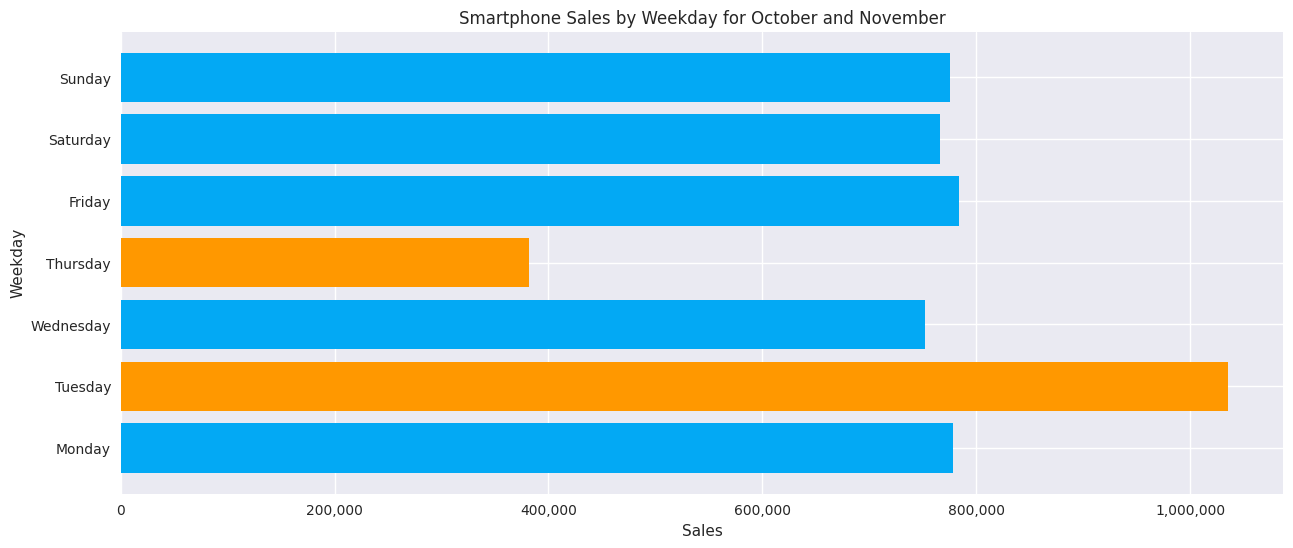

In [101]:
# Filter data to only include washer sales for October and November
washers = ddf[(ddf['Items'] == 'kitchen.washer') & (ddf['date'].dt.month.isin([10, 11]))].compute()

# Group by weekday and count sales
washer_sales_by_weekday = washers.groupby('weekday')['Brand'].count().reset_index()

# Map weekday numbers to names
washer_sales_by_weekday['weekday'] = washer_sales_by_weekday['weekday'].map(weekday_names)

# Rename the columns
washer_sales_by_weekday.columns = ['weekday', 'sales']

# Create plots
plt.figure(figsize=(15,6))
colors = ['#03A9F4', '#FF9800', '#03A9F4', '#FF9800', '#03A9F4', '#03A9F4', '#03A9F4']
plt.barh(smartphone_sales_by_weekday['weekday'], smartphone_sales_by_weekday['sales'], color=colors)
plt.title('Smartphone Sales by Weekday for October and November')
plt.xlabel('Sales')
plt.ylabel('Weekday')
plt.yticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

plt.show()

<a id="additional-comments"></a>
### Additional comments
For the purpose of building real-time models such as recommendation system or sale forecasting based on the data. Here are some advantages and challenges come up with this dataset:

- **Pros:**

    + Rich Data: The dataset includes information about event times, event types, product details, user IDs, and user sessions. This information can be valuable for building a recommendation system.

    + Product Information: The dataset provides product-related information such as product IDs, category codes, and brands. This can help in understanding the characteristics of products and their relationships.
    
    + Time Series Aspect: The dataset includes event times, which can be used for time-based analysis and forecasting.
    
    + Product Information: The dataset contains product-related information such as product IDs, category codes, and brands, which can help identify product trends and relationships.
    
    + Potential Features: The dataset could be enriched with additional external features like promotions, holidays, and economic indicators to enhance the forecasting model.
    

- **Challenges:**

    + Sparse Data: The dataset seems to be focused on user interactions (e.g., views, purchases) rather than explicit user ratings or preferences.

    + Missing Data: There are missing values in columns like 'category_code' and 'brand'. Missing data can affect the accuracy of recommendations, especially if they are important features.

    + Limited User Behavior: The dataset might lack detailed user behavior information. For instance, knowing how long a user spent on a page, or their interactions within a session, can provide better insights.

    

## Converting the dask dataframe to csv for Model Building

In [102]:
# Converting dask dataframe to pandas dataframe
df = ddf.compute()

In [103]:
# Converting pandas dataframe to parquet
df.to_csv('cleaned_datset.csv',index=False)

In [104]:
df.head(5)

date  weekday      time Event_type  Product_id          Category_id  \
0 2019-11-01        4  00:00:00       view     1003461  2053013555631882655   
1 2019-11-01        4  00:00:00       view     5000088  2053013566100866035   
2 2019-11-01        4  00:00:01       view     3601530  2053013563810775923   
3 2019-11-01        4  00:00:01       view     1004775  2053013555631882655   
4 2019-11-01        4  00:00:01       view     1306894  2053013558920217191   

  Main_Category           Items   Brand   Price    User_id  \
0   electronics      smartphone  xiaomi  489.07  520088904   
1    appliances  sewing_machine  janome  293.65  530496790   
2    appliances  kitchen.washer      lg  712.87  518085591   
3   electronics      smartphone  xiaomi  183.27  558856683   
4     computers        notebook      hp  360.09  520772685   

                           User_session  time_dt  
0  4d3b30da-a5e4-49df-b1a8-ba5943f1dd33        0  
1  8e5f4f83-366c-4f70-860e-ca7417414283        0  
2  3bfb58cd-7892-48cc-8020-2f17e6de6e7f        0  
3  313628f1-68b8-460d-84f6-cec7a8796ef2        0  
4  816a59f3-f5ae-4ccd-9b23-82aa8c23d33c        0

In [105]:

# extract the month from the 'date' column
df['month'] = pd.to_datetime(df['date']).dt.month

# get the count of samples for each month
month_counts = df['month'].value_counts()

print(month_counts)


month
10    6260057
11    6124469
Name: count, dtype: int64


In [106]:
#checking dtypes of each variables so as to decide the encoding methods
print(df.dtypes)

date              datetime64[ns]
weekday                    int32
time                      object
Event_type       string[pyarrow]
Product_id                 int64
Category_id                int64
Main_Category    string[pyarrow]
Items            string[pyarrow]
Brand            string[pyarrow]
Price                    float64
User_id                    int64
User_session     string[pyarrow]
time_dt                    int32
month                      int32
dtype: object


In [107]:
from datetime import datetime
# calculate recency (days since last purchase)
max_date = df['date'].max()
recency = df.groupby('User_id')['date'].max().reset_index(name='last_purchase_date')
recency['recency'] = (max_date - recency['last_purchase_date']).dt.days

# calculate frequency (number of purchases)
event_types = ['purchase', 'cart', 'view']
frequency = df[df['Event_type'].isin(event_types)].groupby('User_id')['Event_type'].count().reset_index(name='frequency')

# calculate monetary value (average order value)
monetary = df[df['Event_type'] == 'purchase'].groupby('User_id')['Price'].sum().reset_index(name='monetary')

# merge recency, frequency, and monetary values
rfm = pd.merge(recency, frequency, on='User_id')
rfm = pd.merge(rfm, monetary, on='User_id')

# create RFM scores
rfm['R'] = np.ceil((rfm['recency'].rank(method='dense') / len(rfm)) * 4).astype(int)
rfm['F'] = np.ceil((rfm['frequency'].rank(method='dense') / len(rfm)) * 4).astype(int)
rfm['M'] = np.ceil((rfm['monetary'].rank(method='dense') / len(rfm)) * 4).astype(int)

# create RFM segments
rfm['RFM_Segment'] = rfm['R'].astype(str) + rfm['F'].astype(str) + rfm['M'].astype(str)

In [108]:
rfm.sample(5)

User_id last_purchase_date  recency  frequency  monetary  R  F  M  \
24722   515600314         2019-10-08       30          5    132.05  1  1  1   
55078   528091552         2019-10-03       35         17     89.84  1  1  1   
22816   515240825         2019-11-06        1         11    461.50  1  1  1   
118475  562951743         2019-11-04        3          3    458.15  1  1  1   
68101   538440911         2019-11-05        2         17    187.90  1  1  1   

       RFM_Segment  
24722          111  
55078          111  
22816          111  
118475         111  
68101          111

In [109]:
rfm_segments = rfm['RFM_Segment'].nunique()
print(f"There are {rfm_segments} unique RFM segments.")

There are 2 unique RFM segments.


In [110]:
# Checking the shape of rfm dataframe
rfm.shape

(132181, 9)

In [111]:
rfm_final = rfm[['User_id','recency','frequency','monetary']]
rfm_final.head(5)

User_id  recency  frequency  monetary
0  253299396        1          4    246.85
1  420935067       31         33    385.84
2  428293417        5          5   1575.50
3  433754231        1         74    321.73
4  435648894       32         14    388.13

In [112]:
from sklearn.preprocessing import StandardScaler

# assume your dataset is in a Pandas DataFrame called df

scaler = StandardScaler()

# Scale the data
scaled_data = scaler.fit_transform(rfm_final[['recency', 'frequency', 'monetary']])

# Convert the scaled data back to a Pandas DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=['recency_scaled', 'frequency_scaled', 'monetary_scaled'])

# Concatenate the original user_id column with the scaled data
result_df = pd.concat([rfm_final[['User_id']], scaled_df], axis=1)

result_df.head()

/opt/conda/lib/python3.10/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: DeprecationWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: DeprecationWarning:

is_sparse is deprecated and will be removed in a future version. 

User_id  recency_scaled  frequency_scaled  monetary_scaled
0  253299396       -0.971478         -0.589237        -0.284817
1  420935067        1.030975          0.463658        -0.186784
2  428293417       -0.704484         -0.552930         0.652310
3  433754231       -0.971478          1.952235        -0.232003
4  435648894        1.097724         -0.226170        -0.185169

/opt/conda/lib/python3.10/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: DeprecationWarning:

is_sparse is deprecated and will be removed in a future version. C

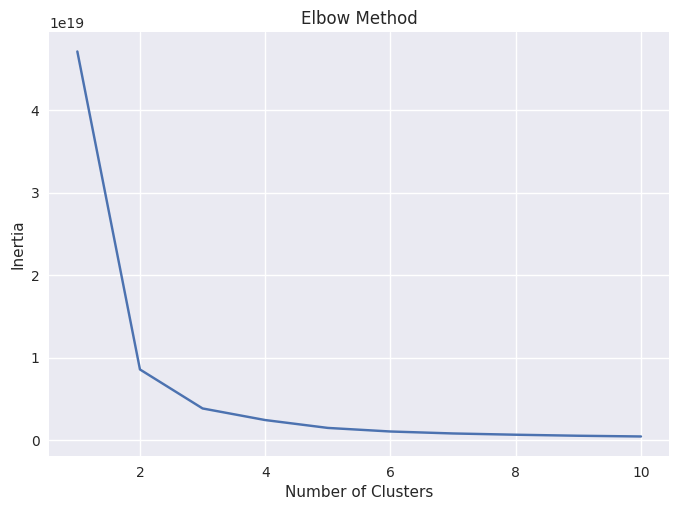

In [113]:
from sklearn.cluster import KMeans
# Elbow method to determine the optimal number of clusters
inertia_values = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(result_df)
    inertia_values.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia_values)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [114]:
# Based on the Elbow method, choose the optimal number of clusters
n_clusters = 5  # for example, choose 3 clusters based on the Elbow method

# Perform K-Means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_data)

# Add the cluster labels to the original DataFrame
result_df['cluster'] = cluster_labels

result_df.head(5)

User_id  recency_scaled  frequency_scaled  monetary_scaled  cluster
0  253299396       -0.971478         -0.589237        -0.284817        1
1  420935067        1.030975          0.463658        -0.186784        0
2  428293417       -0.704484         -0.552930         0.652310        1
3  433754231       -0.971478          1.952235        -0.232003        2
4  435648894        1.097724         -0.226170        -0.185169        0

In [117]:
from sklearn.model_selection import KFold
from sklearn.metrics import silhouette_score

# Define the K-Means clustering model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Define the cross-validation object
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation to evaluate the accuracy of K-Means clustering
scores = []
for train_index, test_index in cv.split(scaled_data):
    X_train, X_test = scaled_data[train_index], scaled_data[test_index]
    kmeans.fit(X_train)
    cluster_labels = kmeans.labels_
    score = silhouette_score(X_test, kmeans.predict(X_test))
    scores.append(score)

# Print the average silhouette score
print("Average silhouette score:", np.mean(scores))

Average silhouette score: 0.6341464003211567


In [118]:
result_df.to_csv('rfm_df.csv')

In [119]:
fig = px.scatter_3d(result_df, x='recency_scaled', y='frequency_scaled', z='monetary_scaled',
                    color='cluster', opacity=0.7)
fig.update_layout(title='3D Scatter Plot of Clusters', scene=dict(
                    xaxis_title='Recency', yaxis_title='Frequency', zaxis_title='Monetary'))
fig.show()

In [ ]:
# plotting outlierd fof our DataFrame
fig = px.box(result_df, x=["recency_scaled", "frequency_scaled", "monetary_scaled"])
fig.update_layout(title="Box Plots for Each Feature")
fig.show()

In [ ]:
# calculating centroids of clusters for naming the clusters in the business context
centroids = result_df.groupby('cluster')[['recency_scaled', 'frequency_scaled', 'monetary_scaled']].mean().reset_index()

print(centroids)


In [ ]:
cluster_counts = result_df['cluster'].value_counts()
print(cluster_counts)

In [121]:
a = df['User_id'].nunique()
print(a)

1416617


In [122]:
import pickle

with open('/kaggle/working/model.pkl', 'wb') as f:
    pickle.dump(kmeans, f)

## ACKNOWLEDGEMENT

I would like to express my gratitude to the dataset provider, eCommerce behavior data from multi category store by Micheal Kechinov, for making their dataset available for analysis. This EDA is based on the dataset provided, which played a crucial role in the insights and conclusions drawn in this notebook.

I would also like to acknowledge the contributions of fellow Kaggle users whose notebooks have been referenced in this analysis. Their work has provided valuable insights and inspiration for the approaches and techniques used in this notebook. The collaborative spirit of the Kaggle community has been instrumental in enriching the analysis presented here.

In [123]:
from IPython.display import FileLink
FileLink(r'cleaned_datset.csv')

/kaggle/working/cleaned_datset.csv